# Import Data

# DATA

In [73]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [74]:
linkHS2 = r"C:\Users\k_pow\OneDrive\Documents\Capstone\EDA\Newark 2003-2013.csv"
HS2 = pd.read_csv(linkHS2, sep=',')
HS2

Port                                    Commodity  \
0      Newark, NJ (Port)                              01 Live Animals   
1      Newark, NJ (Port)                              01 Live Animals   
2      Newark, NJ (Port)                              01 Live Animals   
3      Newark, NJ (Port)                              01 Live Animals   
4      Newark, NJ (Port)                              01 Live Animals   
...                  ...                                          ...   
57523  Newark, NJ (Port)  98 Special Classification Provisions, Nesoi   
57524  Newark, NJ (Port)  98 Special Classification Provisions, Nesoi   
57525  Newark, NJ (Port)  98 Special Classification Provisions, Nesoi   
57526  Newark, NJ (Port)  98 Special Classification Provisions, Nesoi   
57527  Newark, NJ (Port)  98 Special Classification Provisions, Nesoi   

                     Country    Time Customs Value (Gen) ($US)  \
0                     Africa  Sep-03                     8,051   
1                     Africa  Nov-03                     7,770   
2                     Africa  Mar-04                     3,540   
3                     Africa  May-04                    10,718   
4                     Africa  Jun-04                     5,150   
...                      ...     ...                       ...   
57523  South/Central America  Aug-13                 6,408,485   
57524  South/Central America  Sep-13                 5,015,207   
57525  South/Central America  Oct-13                 5,681,496   
57526  South/Central America  Nov-13                 3,847,059   
57527  South/Central America  Dec-13                 6,354,809   

      Vessel Customs Value (Gen) ($US)  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  NaN   
...                                ...   
57523                        6,255,432   
57524                        4,728,208   
57525                        5,402,705   
57526                        3,564,684   
57527                        6,004,334   

      Customs Containerized Vessel Value (Gen) ($US) Vessel SWT (Gen) (kg)  \
0                                                NaN                   NaN   
1                                                NaN                   NaN   
2                                                NaN                   NaN   
3                                                NaN                   NaN   
4                                                NaN                   NaN   
...                                              ...                   ...   
57523                                      5,500,954               518,661   
57524                                      3,895,887               342,459   
57525                                      4,994,644               528,094   
57526                                      3,353,052               386,402   
57527                                      5,531,716               503,347   

      Containerized Vessel SWT (Gen) (kg)  
0                                     NaN  
1                                     NaN  
2                                     NaN  
3                                     NaN  
4                                     NaN  
...                                   ...  
57523                             455,683  
57524                             330,495  
57525                             483,487  
57526                             355,761  
57527                             487,442  

[57528 rows x 9 columns]

In [75]:
# Saving the DataFrame to a CSV file
HS2.to_csv(r"C:\Users\k_pow\OneDrive\Documents\Capstone\EDA\Newark_2003-2013_edit.csv", index=False)


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\k_pow\\OneDrive\\Documents\\Capstone\\EDA\\Newark_2003-2013_edit.csv'

In [76]:
HS2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57528 entries, 0 to 57527
Data columns (total 9 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Port                                            57528 non-null  object
 1   Commodity                                       57528 non-null  object
 2   Country                                         57528 non-null  object
 3   Time                                            57528 non-null  object
 4   Customs Value (Gen) ($US)                       57528 non-null  object
 5   Vessel Customs Value (Gen) ($US)                55005 non-null  object
 6   Customs Containerized Vessel Value (Gen) ($US)  53982 non-null  object
 7   Vessel SWT (Gen) (kg)                           54952 non-null  object
 8   Containerized Vessel SWT (Gen) (kg)             53928 non-null  object
dtypes: object(9)
memory usage: 4.0+ MB


In [77]:
# Remove non-numeric characters like commas or dollar signs
HS2['Customs Value (Gen) ($US)'] = HS2['Customs Value (Gen) ($US)'].replace({'\$': '', ',': ''}, regex=True)
HS2['Vessel Customs Value (Gen) ($US)'] = HS2['Vessel Customs Value (Gen) ($US)'].replace({'\$': '', ',': ''}, regex=True)
HS2['Customs Containerized Vessel Value (Gen) ($US)'] = HS2['Customs Containerized Vessel Value (Gen) ($US)'].replace({'\$': '', ',': ''}, regex=True)
HS2['Vessel SWT (Gen) (kg)'] = HS2['Vessel SWT (Gen) (kg)'].replace({'\$': '', ',': ''}, regex=True)
HS2['Containerized Vessel SWT (Gen) (kg)'] = HS2['Containerized Vessel SWT (Gen) (kg)'].replace({'\$': '', ',': ''}, regex=True)

# Now convert to numeric (this will safely handle any non-numeric values and convert them to NaN)
HS2['Customs Value (Gen) ($US)'] = pd.to_numeric(HS2['Customs Value (Gen) ($US)'], errors='coerce')
HS2['Vessel Customs Value (Gen) ($US)'] = pd.to_numeric(HS2['Vessel Customs Value (Gen) ($US)'], errors='coerce')
HS2['Customs Containerized Vessel Value (Gen) ($US)'] = pd.to_numeric(HS2['Customs Containerized Vessel Value (Gen) ($US)'], errors='coerce')
HS2['Vessel SWT (Gen) (kg)'] = pd.to_numeric(HS2['Vessel SWT (Gen) (kg)'], errors='coerce')
HS2['Containerized Vessel SWT (Gen) (kg)'] = pd.to_numeric(HS2['Containerized Vessel SWT (Gen) (kg)'], errors='coerce')

# Convert the 'Time' column to datetime using the appropriate format
HS2['Time'] = pd.to_datetime(HS2['Time'], format='%b-%y')

# Verify the changes
HS2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57528 entries, 0 to 57527
Data columns (total 9 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   Port                                            57528 non-null  object        
 1   Commodity                                       57528 non-null  object        
 2   Country                                         57528 non-null  object        
 3   Time                                            57528 non-null  datetime64[ns]
 4   Customs Value (Gen) ($US)                       57528 non-null  int64         
 5   Vessel Customs Value (Gen) ($US)                55005 non-null  float64       
 6   Customs Containerized Vessel Value (Gen) ($US)  53982 non-null  float64       
 7   Vessel SWT (Gen) (kg)                           54952 non-null  float64       
 8   Containerized Vessel SWT (Gen) (kg)            

In [60]:
HS2.isna().sum()

Port                                                 0
Commodity                                            0
Country                                              0
Time                                                 0
Customs Value (Gen) ($US)                            0
Vessel Customs Value (Gen) ($US)                  2523
Customs Containerized Vessel Value (Gen) ($US)    3546
Vessel SWT (Gen) (kg)                             2576
Containerized Vessel SWT (Gen) (kg)               3600
dtype: int64

# TOP5 Value

In [78]:
top5_value = HS2.groupby('Commodity')['Customs Containerized Vessel Value (Gen) ($US)'].sum().nlargest(5).index

In [79]:
filtered_HS2 = HS2[HS2['Commodity'].isin(top5_value)]

In [80]:
SUM_values = filtered_HS2.groupby(['Time','Commodity'])['Customs Containerized Vessel Value (Gen) ($US)'].sum().unstack()

In [81]:
SUM_values

Commodity   22 Beverages, Spirits And Vinegar  \
Time                                            
2003-01-01                        142084973.0   
2003-02-01                        149440819.0   
2003-03-01                        187872232.0   
2003-04-01                        216055577.0   
2003-05-01                        184452054.0   
...                                       ...   
2013-08-01                        453900778.0   
2013-09-01                        491307594.0   
2013-10-01                        550309325.0   
2013-11-01                        478871095.0   
2013-12-01                        439147621.0   

Commodity   61 Apparel Articles And Accessories, Knit Or Crochet  \
Time                                                               
2003-01-01                                        255224443.0      
2003-02-01                                        183052236.0      
2003-03-01                                        173476147.0      
2003-04-01                                        164056096.0      
2003-05-01                                        146088332.0      
...                                                       ...      
2013-08-01                                        528466265.0      
2013-09-01                                        431093860.0      
2013-10-01                                        550795060.0      
2013-11-01                                        375947844.0      
2013-12-01                                        392941718.0      

Commodity   62 Apparel Articles And Accessories, Not Knit Etc.  \
Time                                                             
2003-01-01                                        331548490.0    
2003-02-01                                        243321895.0    
2003-03-01                                        212957914.0    
2003-04-01                                        203970213.0    
2003-05-01                                        184021232.0    
...                                                       ...    
2013-08-01                                        544578111.0    
2013-09-01                                        413855352.0    
2013-10-01                                        497716257.0    
2013-11-01                                        371382433.0    
2013-12-01                                        404171792.0    

Commodity   84 Nuclear Reactors, Boilers, Machinery Etc.; Parts  \
Time                                                              
2003-01-01                                       4.257525e+08     
2003-02-01                                       3.628956e+08     
2003-03-01                                       4.630197e+08     
2003-04-01                                       4.281720e+08     
2003-05-01                                       4.125045e+08     
...                                                       ...     
2013-08-01                                       1.218055e+09     
2013-09-01                                       9.898325e+08     
2013-10-01                                       1.112896e+09     
2013-11-01                                       1.031562e+09     
2013-12-01                                       9.915474e+08     

Commodity   85 Electric Machinery Etc; Sound Equip; Tv Equip; Pts  
Time                                                               
2003-01-01                                        174270102.0      
2003-02-01                                        135884843.0      
2003-03-01                                        140032689.0      
2003-04-01                                        149463613.0      
2003-05-01                                        154478357.0      
...                                                       ...      
2013-08-01                                        543666747.0      
2013-09-01                                        517638581.0      
2013-10-01                                        643431666.0     

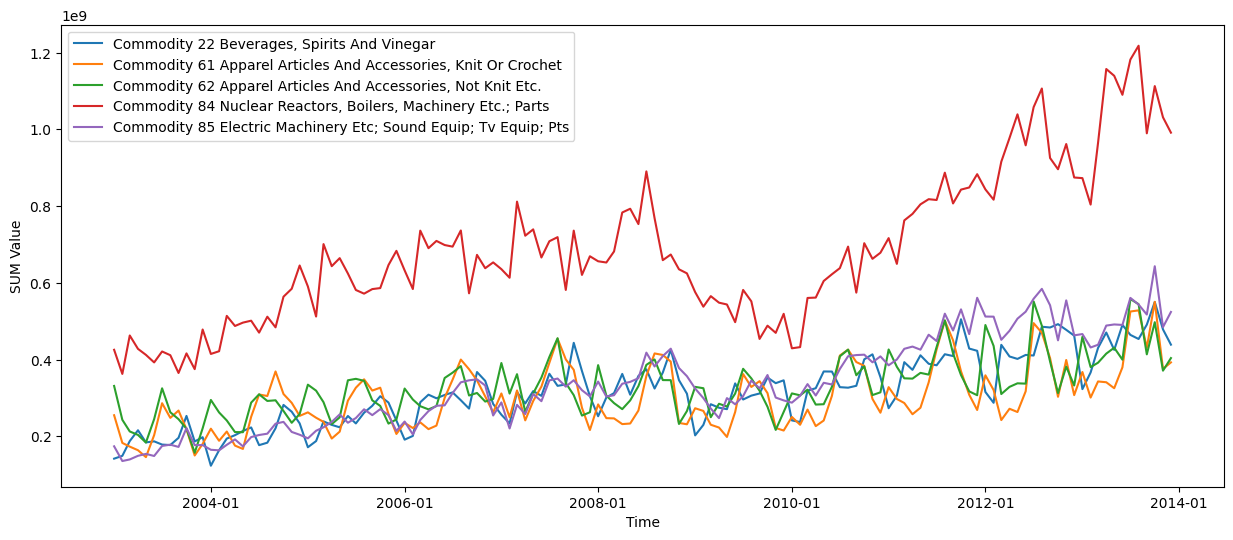

In [83]:
colors = ['b', 'g', 'r', 'c', 'm']

plt.figure(figsize=(15,6))

for commodity in SUM_values.columns:
  plt.plot(SUM_values.index, SUM_values[commodity], label=f'Commodity {commodity}')

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.xlabel('Time')
plt.ylabel('SUM Value')
plt.legend(loc='upper left')
plt.show()

In [84]:
corr_matrix = SUM_values.corr()
corr_matrix

Commodity                                           22 Beverages, Spirits And Vinegar  \
Commodity                                                                               
22 Beverages, Spirits And Vinegar                                            1.000000   
61 Apparel Articles And Accessories, Knit Or Cr...                           0.630017   
62 Apparel Articles And Accessories, Not Knit Etc.                           0.564815   
84 Nuclear Reactors, Boilers, Machinery Etc.; P...                           0.824573   
85 Electric Machinery Etc; Sound Equip; Tv Equi...                           0.897625   

Commodity                                           61 Apparel Articles And Accessories, Knit Or Crochet  \
Commodity                                                                                                  
22 Beverages, Spirits And Vinegar                                                            0.630017      
61 Apparel Articles And Accessories, Knit Or Cr...                                           1.000000      
62 Apparel Articles And Accessories, Not Knit Etc.                                           0.863621      
84 Nuclear Reactors, Boilers, Machinery Etc.; P...                                           0.616510      
85 Electric Machinery Etc; Sound Equip; Tv Equi...                                           0.708671      

Commodity                                           62 Apparel Articles And Accessories, Not Knit Etc.  \
Commodity                                                                                                
22 Beverages, Spirits And Vinegar                                                            0.564815    
61 Apparel Articles And Accessories, Knit Or Cr...                                           0.863621    
62 Apparel Articles And Accessories, Not Knit Etc.                                           1.000000    
84 Nuclear Reactors, Boilers, Machinery Etc.; P...                                           0.711740    
85 Electric Machinery Etc; Sound Equip; Tv Equi...                                           0.750128    

Commodity                                           84 Nuclear Reactors, Boilers, Machinery Etc.; Parts  \
Commodity                                                                                                 
22 Beverages, Spirits And Vinegar                                                            0.824573     
61 Apparel Articles And Accessories, Knit Or Cr...                                           0.616510     
62 Apparel Articles And Accessories, Not Knit Etc.                                           0.711740     
84 Nuclear Reactors, Boilers, Machinery Etc.; P...                                           1.000000     
85 Electric Machinery Etc; Sound Equip; Tv Equi...                                           0.859705     

Commodity                                           85 Electric Machinery Etc; Sound Equip; Tv Equip; Pts  
Commodity                                                                                                  
22 Beverages, Spirits And Vinegar                                                            0.897625      
61 Apparel Articles And Accessories, Knit Or Cr...                                           0.708671      
62 Apparel Articles And Accessories, Not Knit Etc.                                           0.750128      
84 Nuclear Reactors, Boilers, Machinery Etc.; P...                                           0.859705      
85 Electric Machinery Etc; Sound Equip; Tv Equi...                                           1.000000

In [85]:
#!pip install stemgraphic
import stemgraphic

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/61.9 kB ? eta -:--:--
   -------------------------- ------------- 41.0/61.9 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 61.9/61.9 kB 820.6 kB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13773 sha256=b08ebfb789806d6a79e54b735725827d861aac37005c7a90d3f465fd78551dbe
  Stored in directory: c:\users\k_pow\appdata\local\pip\cache\wheels\1a\bf\a1\4cee4f7678c68c5875ca89eaccf460593539805c3906722228
Successfully built docopt



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


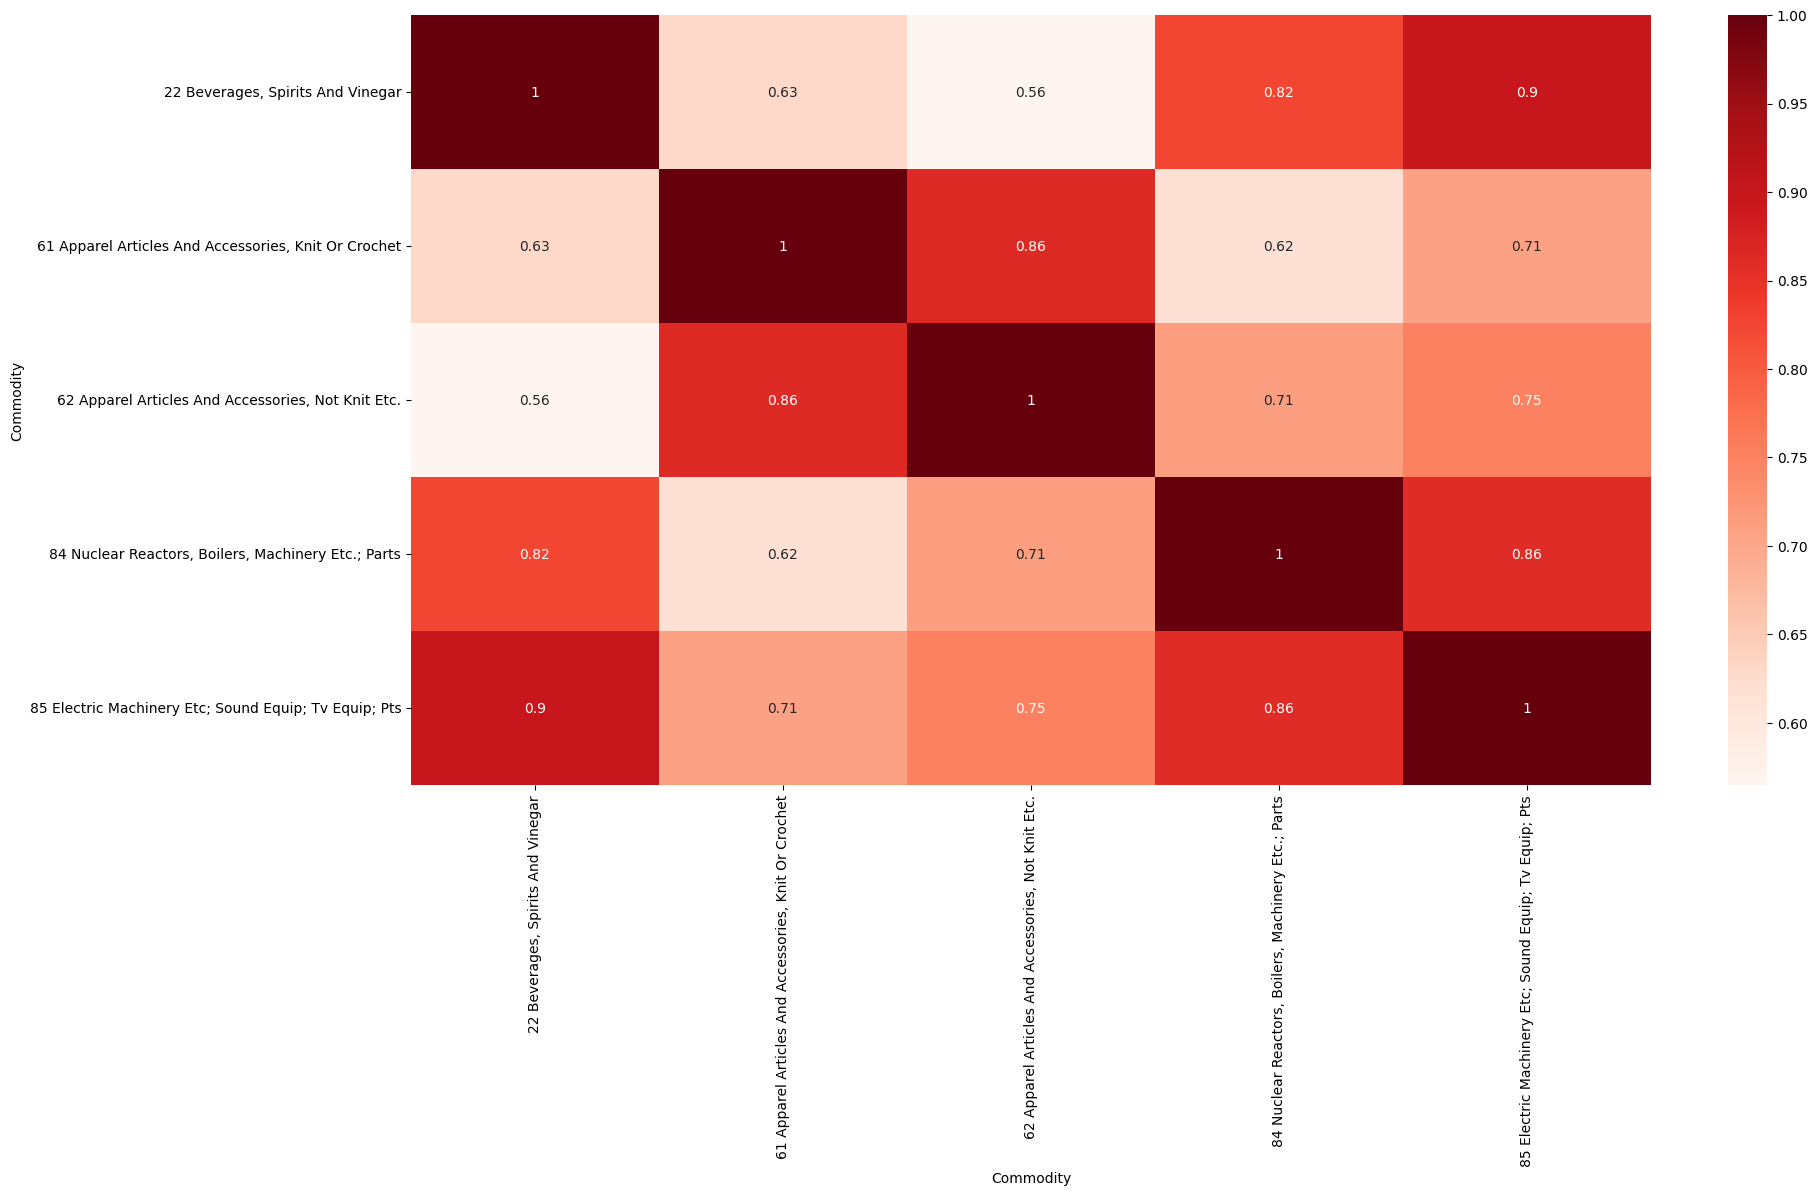

In [86]:
import seaborn as sns
plt.figure(figsize=(20,10))
cor = SUM_values.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# TOP5 Weight

In [87]:
top5_weight = HS2.groupby('Commodity')['Containerized Vessel SWT (Gen) (kg)'].sum().nlargest(5).index

In [88]:
filtered_WGT_HS2 = HS2[HS2['Commodity'].isin(top5_weight)]

In [89]:
SUM_weight = filtered_WGT_HS2.groupby(['Time','Commodity'])['Containerized Vessel SWT (Gen) (kg)'].sum().unstack()

In [90]:
SUM_weight.fillna(0)
SUM_weight

Commodity   20 Prep Vegetables, Fruit, Nuts Or Other Plant Parts  \
Time                                                               
2003-01-01                                         58740120.0      
2003-02-01                                         48949529.0      
2003-03-01                                         56071221.0      
2003-04-01                                         57402564.0      
2003-05-01                                         58873192.0      
...                                                       ...      
2013-08-01                                         85614759.0      
2013-09-01                                         83639741.0      
2013-10-01                                         94876684.0      
2013-11-01                                         81125579.0      
2013-12-01                                        109534360.0      

Commodity   22 Beverages, Spirits And Vinegar  \
Time                                            
2003-01-01                         83299169.0   
2003-02-01                         78768851.0   
2003-03-01                         95870442.0   
2003-04-01                        114834120.0   
2003-05-01                        100548299.0   
...                                       ...   
2013-08-01                        172965344.0   
2013-09-01                        167732051.0   
2013-10-01                        182866662.0   
2013-11-01                        159479999.0   
2013-12-01                        146292878.0   

Commodity   27 Mineral Fuel, Oil Etc.; Bitumin Subst; Mineral Wax  \
Time                                                                
2003-01-01                                          1781707.0       
2003-02-01                                          1580639.0       
2003-03-01                                          3056666.0       
2003-04-01                                         35266885.0       
2003-05-01                                         57988486.0       
...                                                       ...       
2013-08-01                                         73896830.0       
2013-09-01                                          6400574.0       
2013-10-01                                          5244773.0       
2013-11-01                                         39792825.0       
2013-12-01                                         39729835.0       

Commodity   39 Plastics And Articles Thereof  \
Time                                           
2003-01-01                        72176215.0   
2003-02-01                        57220573.0   
2003-03-01                        63596774.0   
2003-04-01                        63971232.0   
2003-05-01                        71938782.0   
...                                      ...   
2013-08-01                       106386485.0   
2013-09-01                       100326928.0   
2013-10-01                       112859159.0   
2013-11-01                        90098561.0   
2013-12-01                        92373803.0   

Commodity   94 Furnit;bedding,mattres;luminaires,light Fix;prefab  
Time                                                               
2003-01-01                                         70963446.0      
2003-02-01                                         59277030.0      
2003-03-01                                         61777869.0      
2003-04-01                                         65759883.0      
2003-05-01                                         66614277.0      
...                                                       ...      
2013-08-01                                         85464594.0      
2013-09-01                                         79445140.0      
2013-10-01                                         95197869.0      
2013-11-01                                         75989589.0      
2013-12-01                                         90273520.0      

[132 rows x 5 columns]

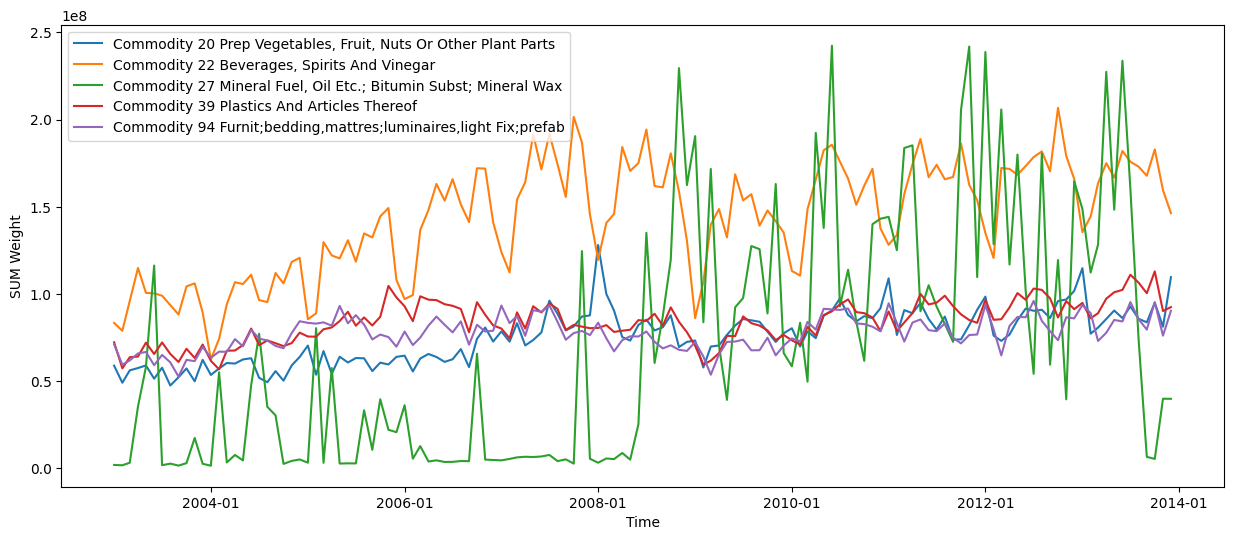

In [91]:
colors = ['b', 'g', 'r', 'c', 'm']

plt.figure(figsize=(15,6))

for commodity in SUM_weight.columns:
  plt.plot(SUM_weight.index, SUM_weight[commodity], label=f'Commodity {commodity}')

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.xlabel('Time')
plt.ylabel('SUM Weight')
plt.legend(loc='upper left')
plt.show()

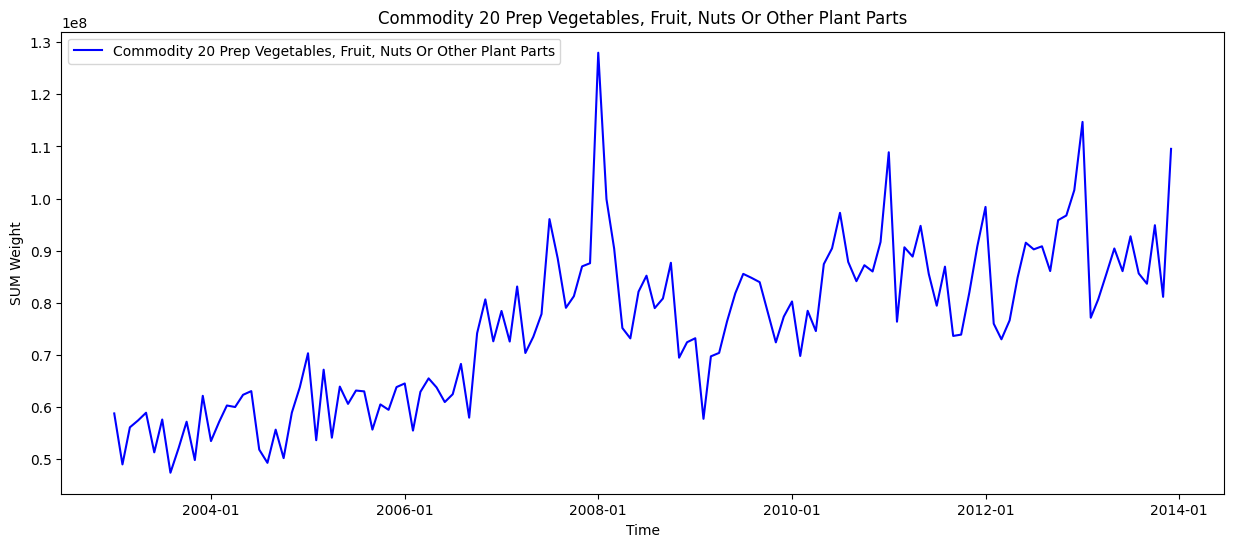

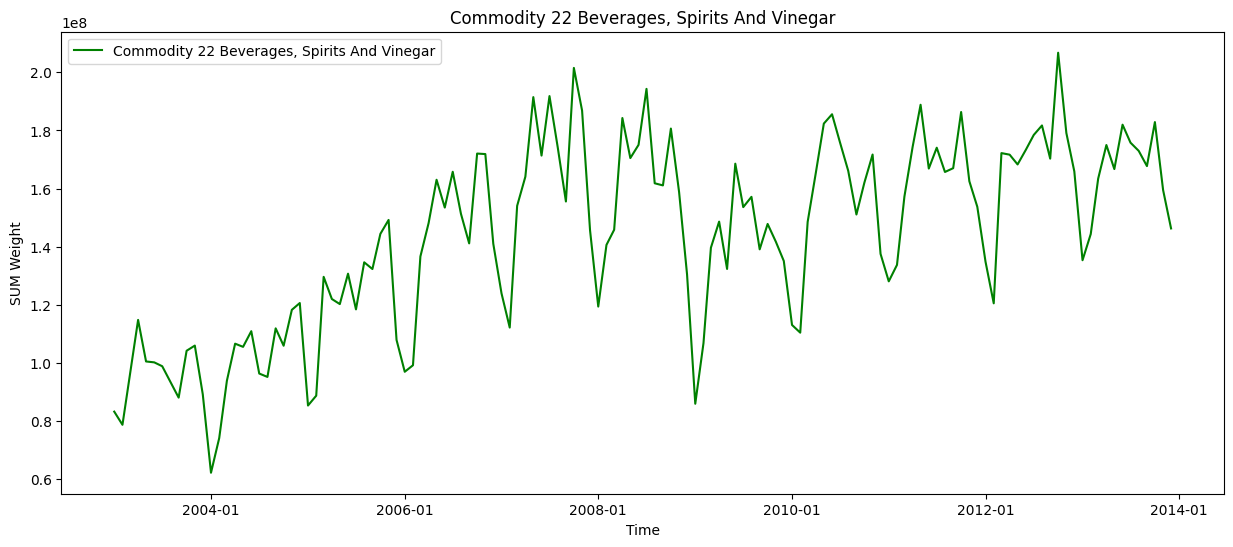

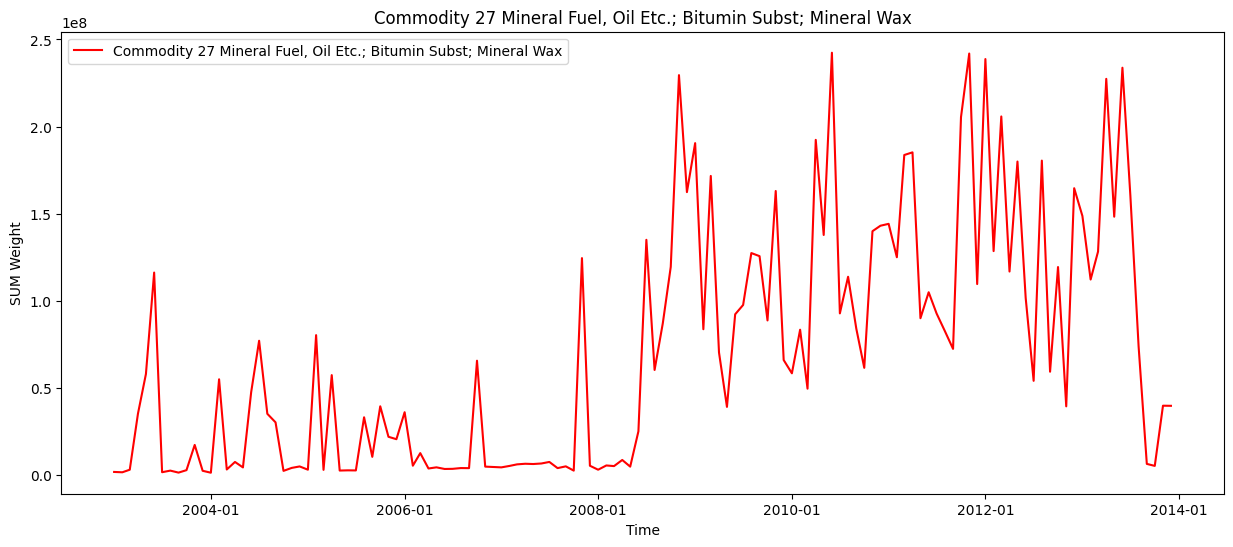

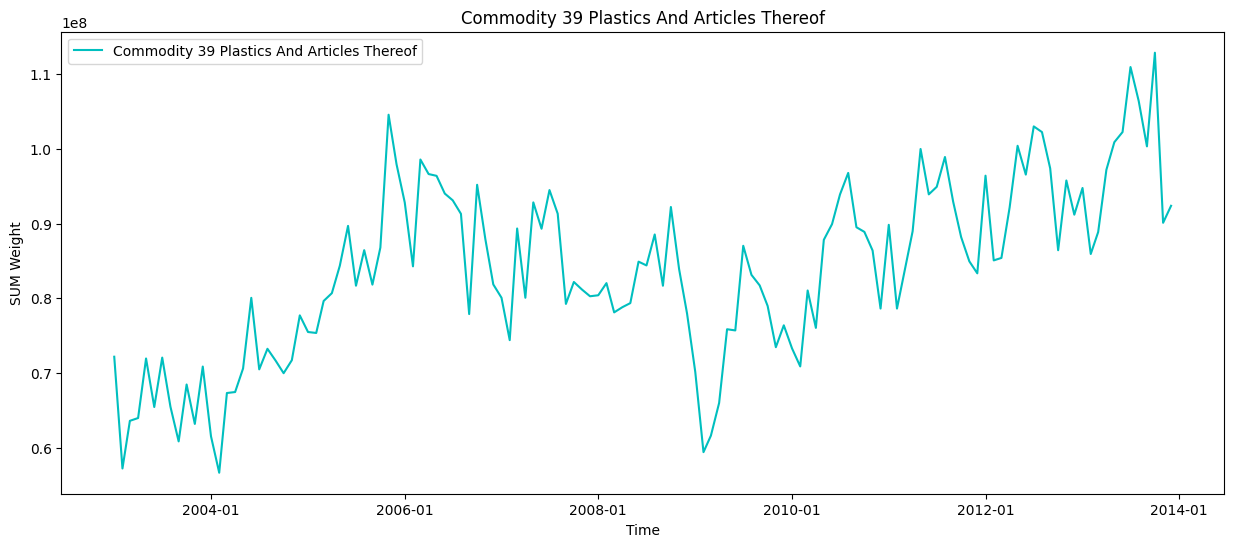

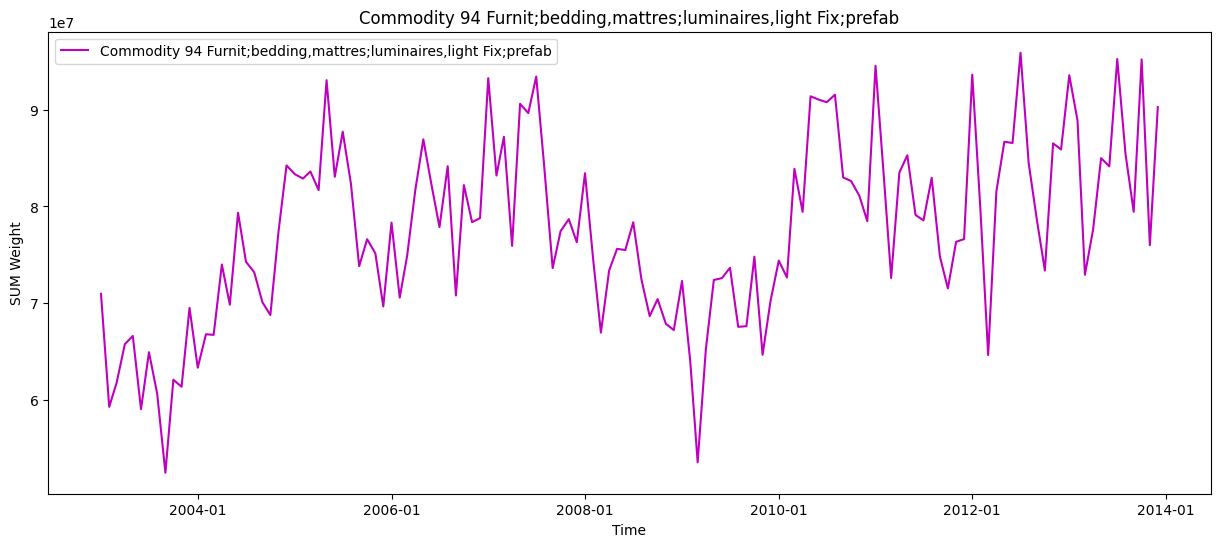

In [92]:
colors = ['b', 'g', 'r', 'c', 'm']
color_index = 0

for commodity in SUM_weight.columns:
    plt.figure(figsize=(15, 6))
    plt.plot(SUM_weight.index, SUM_weight[commodity], label=f'Commodity {commodity}', color=colors[color_index])

    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
    plt.xlabel('Time')
    plt.ylabel('SUM Weight')
    plt.title(f'Commodity {commodity}')
    plt.legend(loc='upper left')
    plt.show()

    color_index = (color_index + 1) % len(colors)

In [93]:
corr_matrix_w = SUM_weight.corr()
corr_matrix_w

Commodity                                           20 Prep Vegetables, Fruit, Nuts Or Other Plant Parts  \
Commodity                                                                                                  
20 Prep Vegetables, Fruit, Nuts Or Other Plant ...                                           1.000000      
22 Beverages, Spirits And Vinegar                                                            0.632245      
27 Mineral Fuel, Oil Etc.; Bitumin Subst; Miner...                                           0.408984      
39 Plastics And Articles Thereof                                                             0.571388      
94 Furnit;bedding,mattres;luminaires,light Fix;...                                           0.560101      

Commodity                                           22 Beverages, Spirits And Vinegar  \
Commodity                                                                               
20 Prep Vegetables, Fruit, Nuts Or Other Plant ...                           0.632245   
22 Beverages, Spirits And Vinegar                                            1.000000   
27 Mineral Fuel, Oil Etc.; Bitumin Subst; Miner...                           0.358180   
39 Plastics And Articles Thereof                                             0.703476   
94 Furnit;bedding,mattres;luminaires,light Fix;...                           0.460867   

Commodity                                           27 Mineral Fuel, Oil Etc.; Bitumin Subst; Mineral Wax  \
Commodity                                                                                                   
20 Prep Vegetables, Fruit, Nuts Or Other Plant ...                                           0.408984       
22 Beverages, Spirits And Vinegar                                                            0.358180       
27 Mineral Fuel, Oil Etc.; Bitumin Subst; Miner...                                           1.000000       
39 Plastics And Articles Thereof                                                             0.235739       
94 Furnit;bedding,mattres;luminaires,light Fix;...                                           0.100266       

Commodity                                           39 Plastics And Articles Thereof  \
Commodity                                                                              
20 Prep Vegetables, Fruit, Nuts Or Other Plant ...                          0.571388   
22 Beverages, Spirits And Vinegar                                           0.703476   
27 Mineral Fuel, Oil Etc.; Bitumin Subst; Miner...                          0.235739   
39 Plastics And Articles Thereof                                            1.000000   
94 Furnit;bedding,mattres;luminaires,light Fix;...                          0.709112   

Commodity                                           94 Furnit;bedding,mattres;luminaires,light Fix;prefab  
Commodity                                                                                                  
20 Prep Vegetables, Fruit, Nuts Or Other Plant ...                                           0.560101      
22 Beverages, Spirits And Vinegar                                                            0.460867      
27 Mineral Fuel, Oil Etc.; Bitumin Subst; Miner...                                           0.100266      
39 Plastics And Articles Thereof                                                             0.709112      
94 Furnit;bedding,mattres;luminaires,light Fix;...                                           1.000000

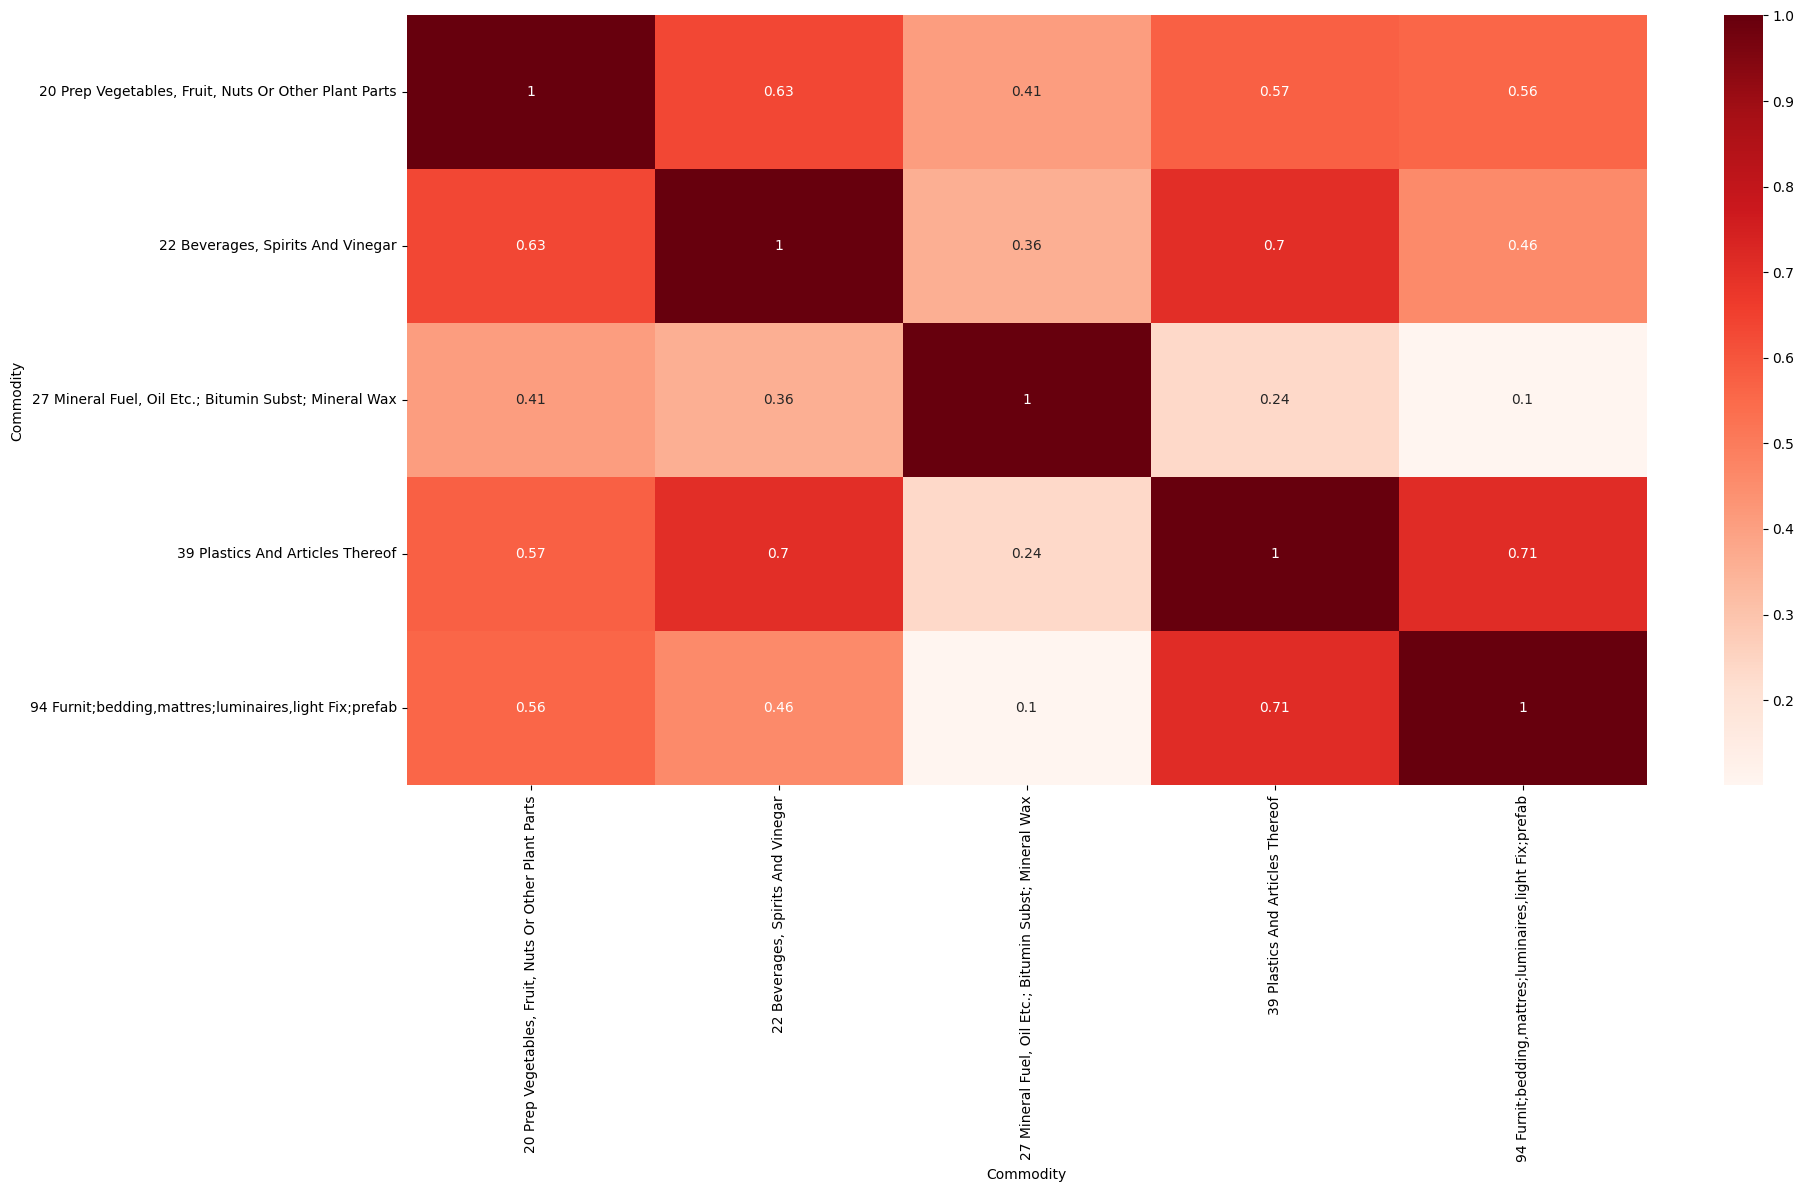

In [94]:
plt.figure(figsize=(20,10))
cor = SUM_weight.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Value - Time Seiries

In [ ]:
#!pip install pmdarima
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
from sklearn.model_selection import train_test_split

In [ ]:
Value22 = SUM_values[['22 Beverages, Spirits And Vinegar']]
Value22 = Value22.loc['2015-01-01':]
Value22

Commodity   22 Beverages, Spirits And Vinegar
Time                                         
2015-01-01                         31151021.0
2015-02-01                         24794845.0
2015-03-01                         38568001.0
2015-04-01                         40693359.0
2015-05-01                         49741833.0
...                                       ...
2023-04-01                         33497739.0
2023-05-01                         40384107.0
2023-06-01                         39033801.0
2023-07-01                         29772975.0
2023-08-01                         40149868.0

[104 rows x 1 columns]

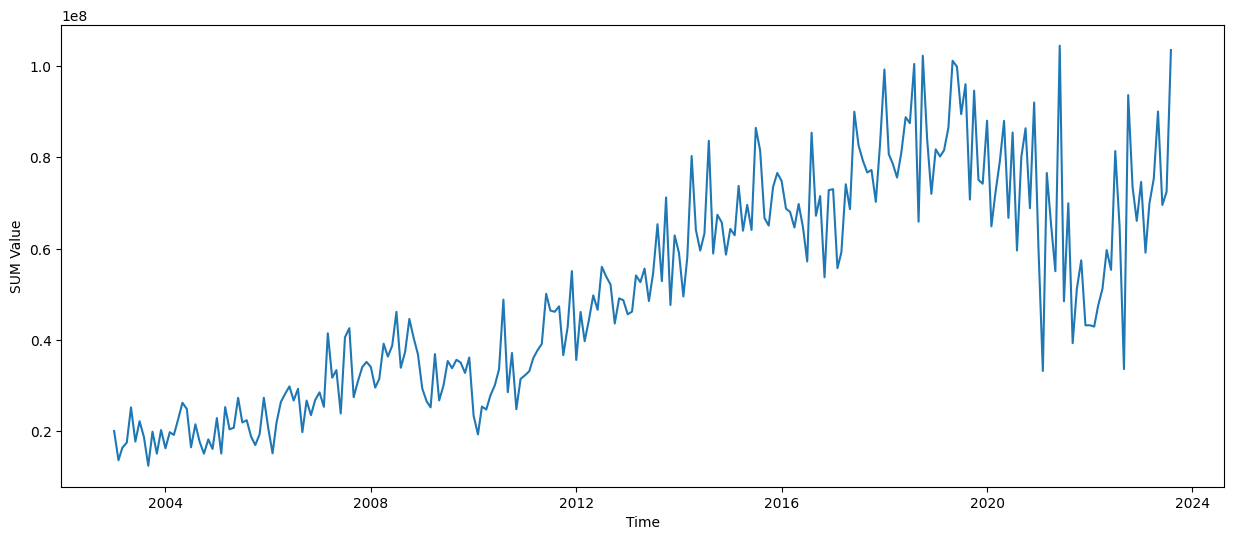

In [ ]:
plt.figure(figsize=(15,6))

plt.plot(Value_84_39.index, Value_84_39)
plt.xlabel('Time')
plt.ylabel('SUM Value')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf

In [ ]:
Value_84_39

Commodity   84Nuclear_39Plastics
Time                            
2003-01-01            20089251.0
2003-02-01            13694632.0
2003-03-01            16459151.0
2003-04-01            17543629.0
2003-05-01            25266289.0
...                          ...
2023-04-01            75382666.0
2023-05-01            90079614.0
2023-06-01            69588277.0
2023-07-01            72482701.0
2023-08-01           103512951.0

[248 rows x 1 columns]

In [ ]:
temp = pd.Series(Value_84_39['84Nuclear_39Plastics'].values, index=Value_84_39.index)
temp.index.freq = 'MS'
decomp = seasonal_decompose(temp)

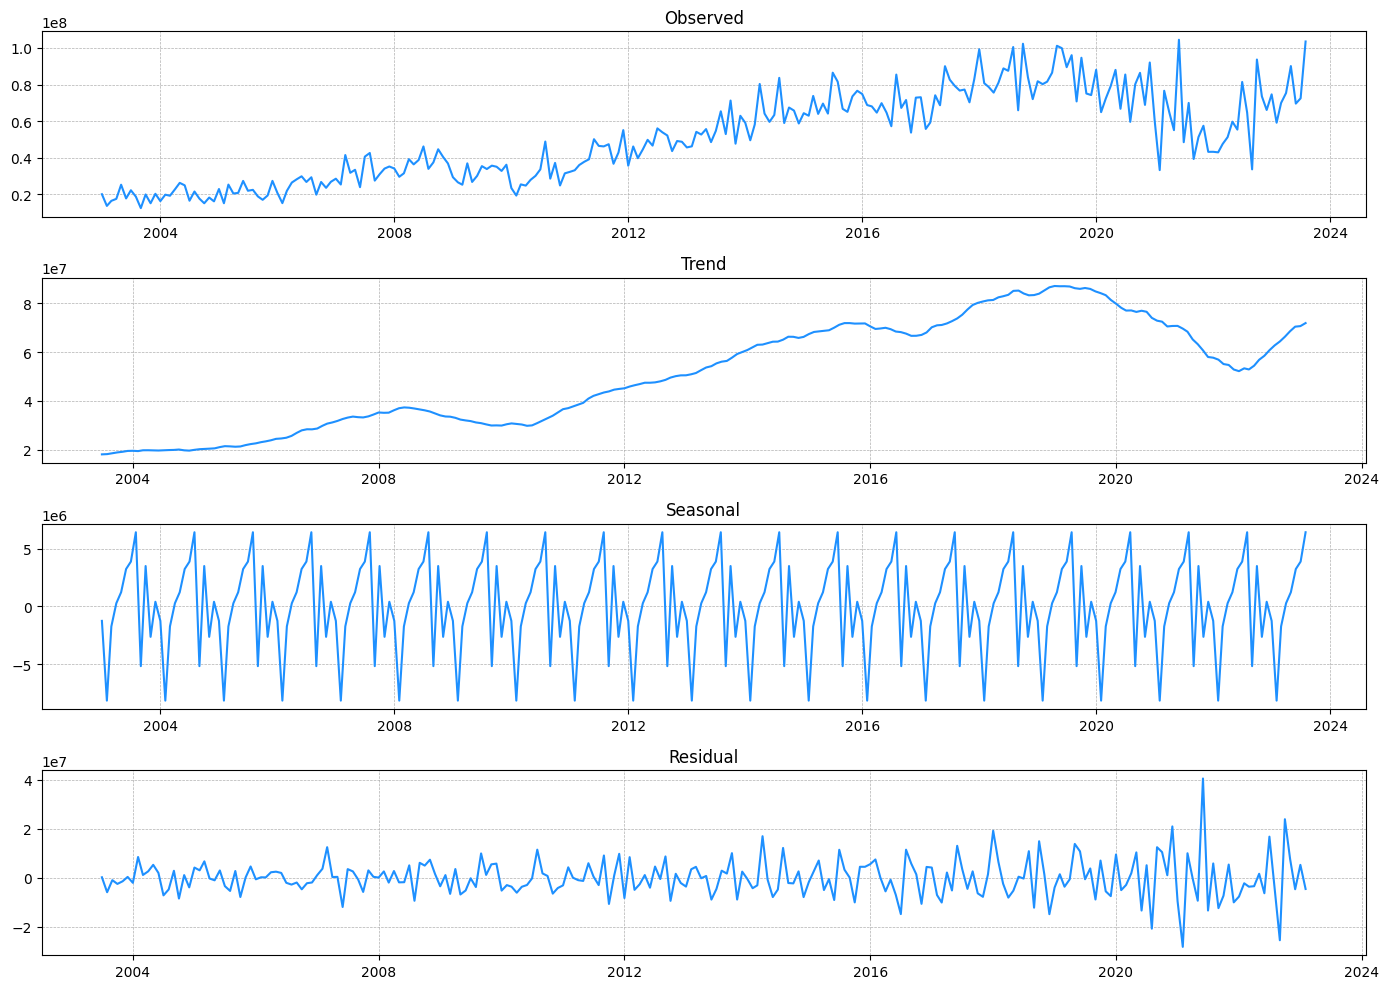

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(14, 10))

axes[0].plot(decomp.observed, color='dodgerblue')
axes[0].set_title('Observed')
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[1].plot(decomp.trend, color='dodgerblue')
axes[1].set_title('Trend')
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[2].plot(decomp.seasonal, color='dodgerblue')
axes[2].set_title('Seasonal')
axes[2].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[3].plot(decomp.resid, color='dodgerblue')
axes[3].set_title('Residual')
axes[3].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

In [ ]:
def auto_arima_model(df):
  s = df.columns[0]
  print(s)
  y = pd.DataFrame(df[df.columns[0]])

  train,test = train_test_split(y,train_size=0.75,shuffle=False)
  model = auto_arima(train, trace=True, error_action='ignore',
                     suppress_warnings=True, seasonal=True, m=12, stepwise=True)

  fitted_model = model.fit(train)

  start_index = test.index.min()
  end_index = test.index.max()
  forecast = fitted_model.predict(n_periods=len(test))
  forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

  mape = mean_absolute_percentage_error(y[start_index:end_index], forecast)
  print('MAPE:{}'.format(mape))
  rmse = mean_squared_error(y[start_index:end_index], forecast, squared=False)
  print('RMSE:{}'.format(rmse))
  mae = mean_absolute_error(y[start_index:end_index], forecast)
  print('MAE:{}'.format(mae))

  plt.plot(y,label='Train and Valid',color='C3')
  plt.plot(forecast, label='Prediction auto arima',color='C0')
  plt.xlabel('Time')
  plt.ylabel('SUM Value')
  plt.legend()
  plt.show()

22 Beverages, Spirits And Vinegar
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=3.04 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2723.335, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2698.581, Time=0.84 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2697.761, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2721.359, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2714.746, Time=0.08 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2692.364, Time=1.07 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2692.048, Time=0.44 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=2693.013, Time=1.45 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=2694.356, Time=2.47 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=2710.249, Time=0.79 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=2691.375, Time=2.81 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2709.042, Time=0.77 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=2692.302, Time

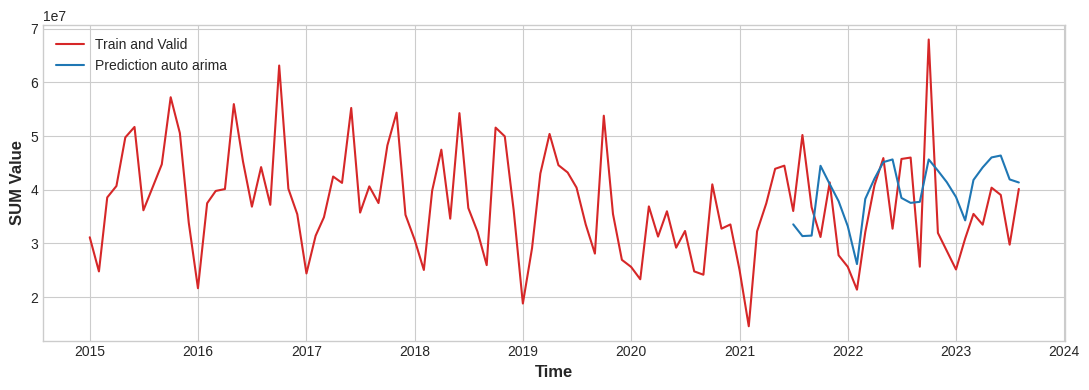

In [ ]:
auto_arima_model(Value22)

In [ ]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

In [ ]:
def Holt_Winters(df):
  s = df.columns[0]
  print(s)
  df= df[df[df.columns[0]] != 0]
  y = pd.DataFrame(df[df.columns[0]])
  train,test = train_test_split(y,train_size=0.75,shuffle=False)

  model = ExponentialSmoothing(train, trend='add',seasonal = 'mul', seasonal_periods= 12)
  fitted_model = model.fit()
  print("Alpha value from the model is ", fitted_model.params['smoothing_level'])
  print("Beta value from the model is ", fitted_model.params['smoothing_trend'])
  print("Gamma value from the model is ", fitted_model.params['smoothing_seasonal'])

  y_ses = pd.Series(fitted_model.forecast(len(test)), index=test.index)

  mape = mean_absolute_percentage_error(test, y_ses)
  print('MAPE:{}'.format(mape))
  rmse = mean_squared_error(test, y_ses, squared=False)
  print('RMSE:{}'.format(rmse))
  mae = mean_absolute_error(test, y_ses)
  print('MAE:{}'.format(mae))

  plt.plot(y,label='Train and Valid',color='C3')
  plt.plot(y_ses, label='HW Predictions',color='blue')
  plt.xlabel('Time')
  plt.ylabel('SUM Value')
  plt.legend();
  plt.show()

22 Beverages, Spirits And Vinegar
Alpha value from the model is  0.07571428571428572
Beta value from the model is  0.07571428571428572
Gamma value from the model is  0.0001
MAPE:0.24634720109972288
RMSE:12063737.02366184
MAE:9693630.63298325


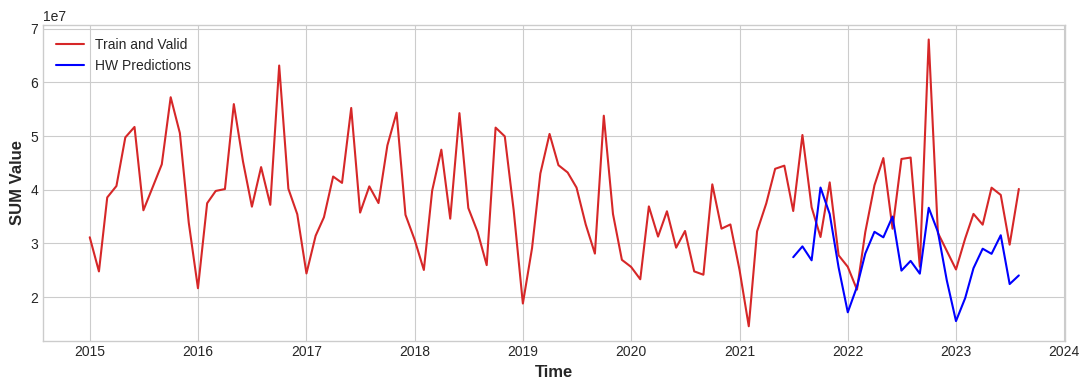

In [ ]:
Holt_Winters(Value22)

In [ ]:
HS87 = HS2[HS2['Commodity'] == '87 Vehicles, Except Railway Or Tramway, And Parts Etc']
Value_HS87 = pd.DataFrame(HS87.groupby('Time')['Vessel Customs Value (Gen) ($US)'].sum())

In [ ]:
temp2 = pd.Series(Value_HS87['Vessel Customs Value (Gen) ($US)'].values, index=Value_HS87.index)
temp2.index.freq = 'MS'
decomp2 = seasonal_decompose(temp2)

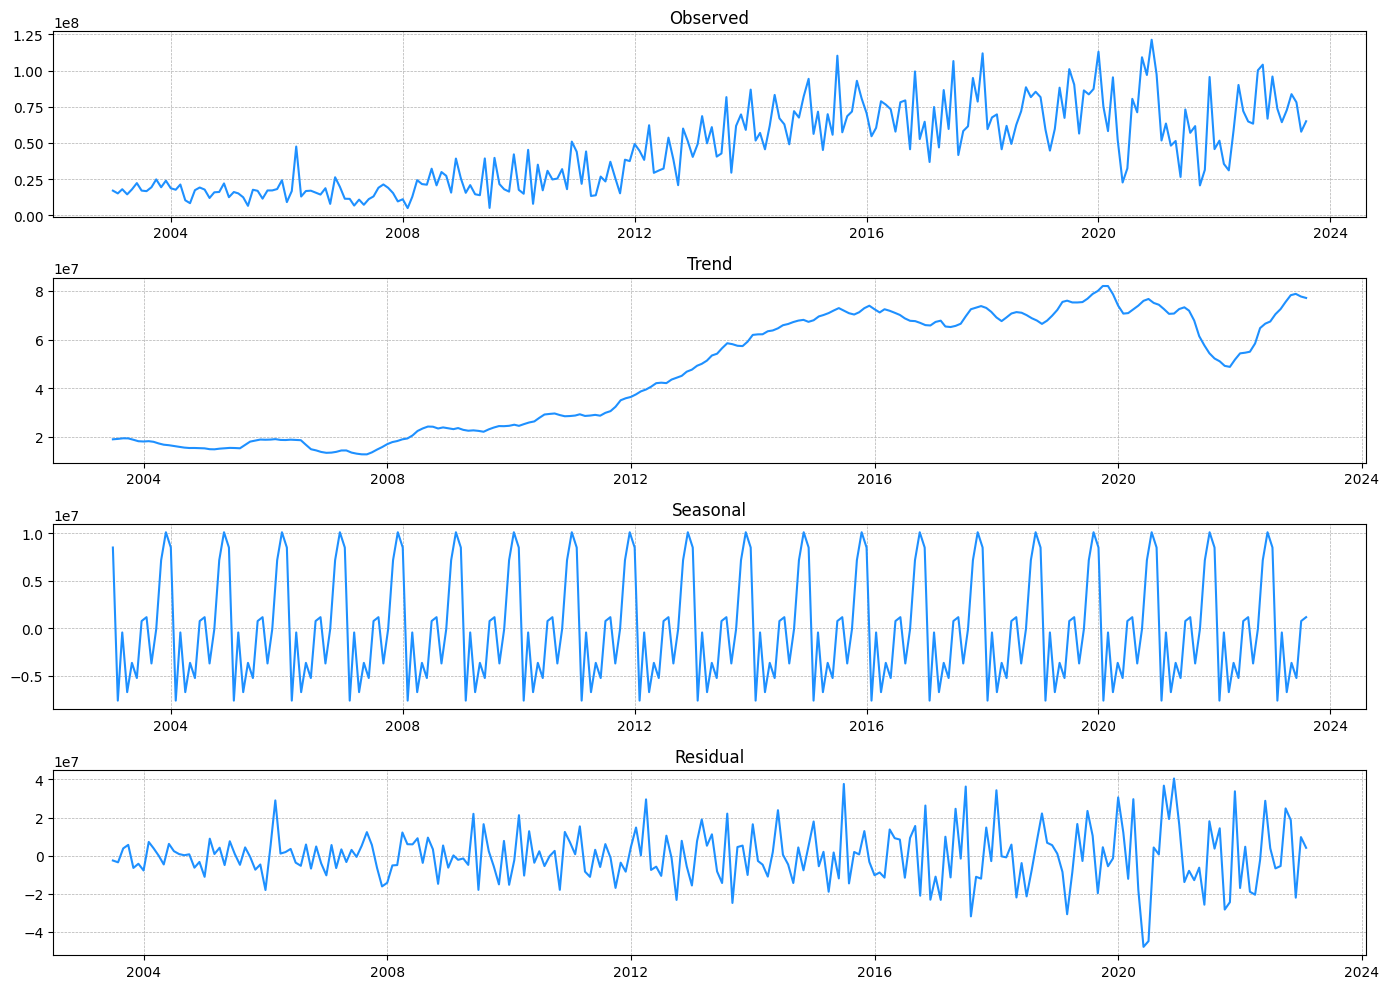

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(14, 10))

axes[0].plot(decomp2.observed, color='dodgerblue')
axes[0].set_title('Observed')
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[1].plot(decomp2.trend, color='dodgerblue')
axes[1].set_title('Trend')
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[2].plot(decomp2.seasonal, color='dodgerblue')
axes[2].set_title('Seasonal')
axes[2].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[3].plot(decomp2.resid, color='dodgerblue')
axes[3].set_title('Residual')
axes[3].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

Vessel Customs Value (Gen) ($US)
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=4.30 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=6737.651, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=6642.136, Time=0.37 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=6613.154, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=6735.683, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=6613.962, Time=0.33 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=6613.443, Time=0.87 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=6614.626, Time=0.22 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=6612.029, Time=1.49 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=6611.788, Time=4.40 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=inf, Time=3.60 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=6738.484, Time=1.64 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=4.94 sec
 ARIMA

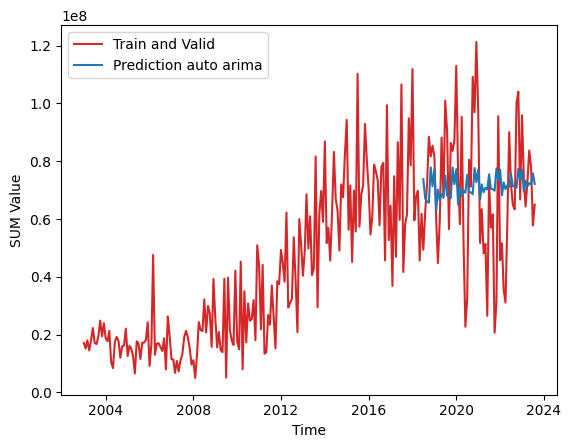

In [ ]:
auto_arima_model(Value_HS87)

Vessel Customs Value (Gen) ($US)
Alpha value from the model is  0.11107142857142857
Beta value from the model is  0.01234126984126984
Gamma value from the model is  0.1646164021164021
MAPE:0.42038280518485693
RMSE:25554936.161699597
MAE:19701143.38511509


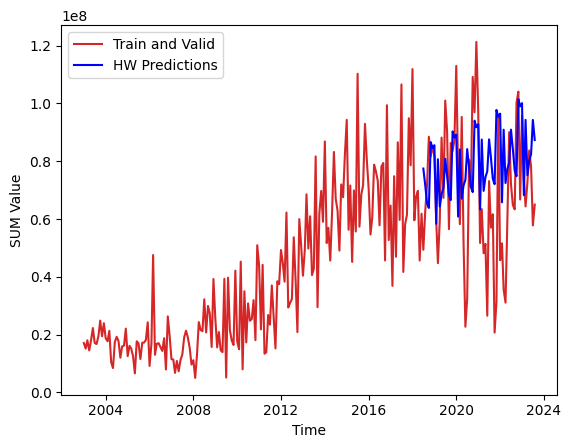

In [ ]:
Holt_Winters(Value_HS87)

# Weight - Time Series

In [ ]:
Weight_HS22 = SUM_weight[['22 Beverages, Spirits And Vinegar']]
Weight_HS22 = Weight_HS22.loc['2015-01-01':]
Weight_HS22

Commodity   22 Beverages, Spirits And Vinegar
Time                                         
2015-01-01                         11197693.0
2015-02-01                         11324540.0
2015-03-01                         13675124.0
2015-04-01                         19134712.0
2015-05-01                         20502318.0
...                                       ...
2023-04-01                          9091357.0
2023-05-01                         11719471.0
2023-06-01                         10524393.0
2023-07-01                          9019337.0
2023-08-01                         12479391.0

[104 rows x 1 columns]

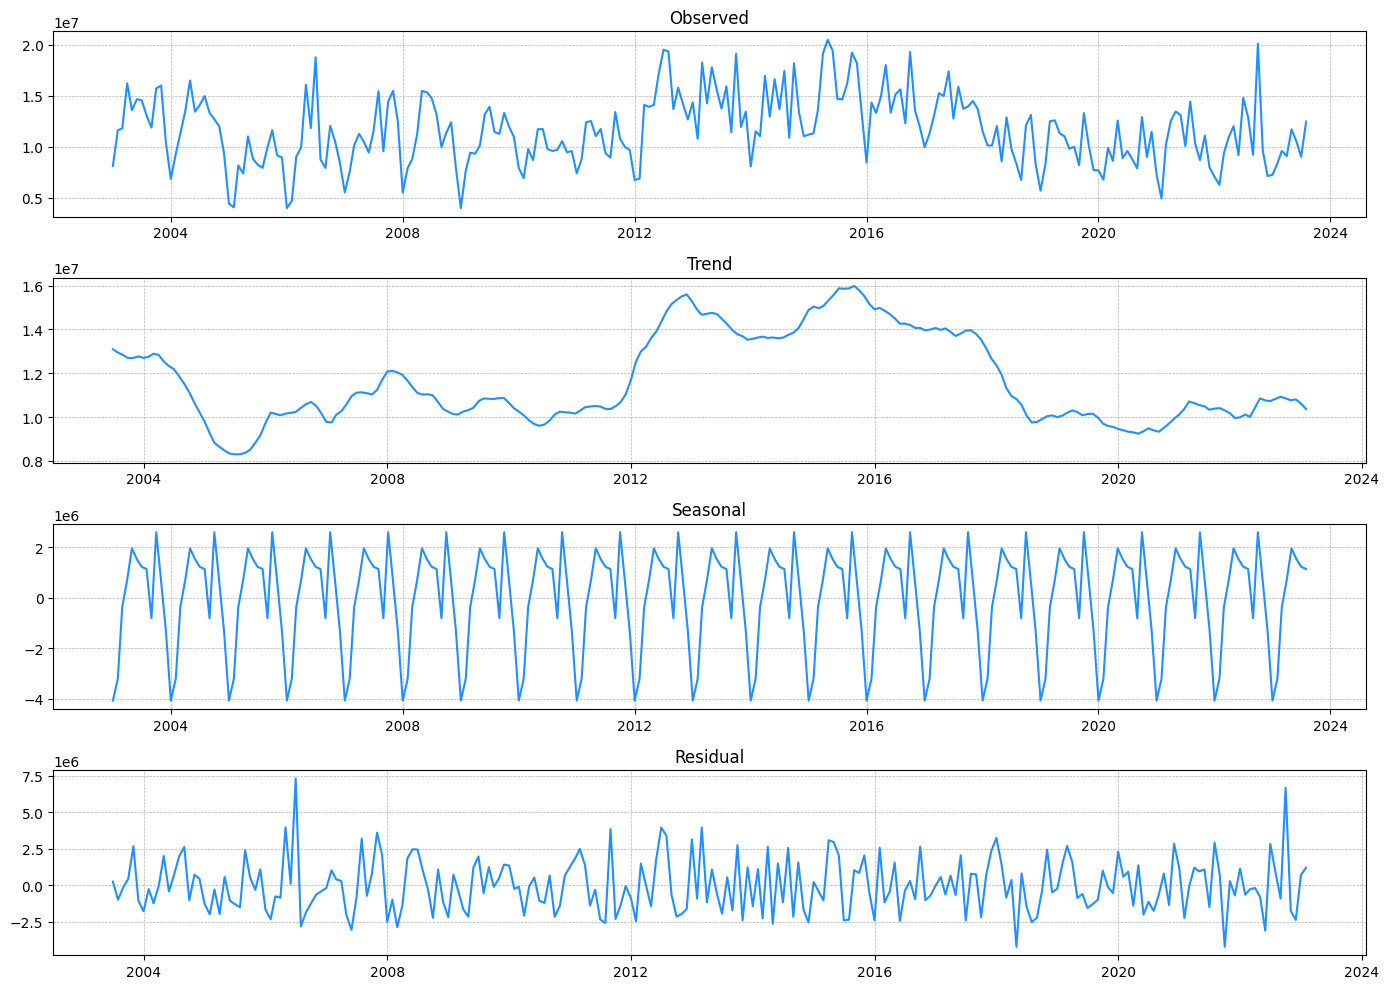

In [ ]:
temp3 = pd.Series(Weight_HS22['22 Beverages, Spirits And Vinegar'].values, index=Weight_HS22.index)
temp3.index.freq = 'MS'
decomp3 = seasonal_decompose(temp3)

fig, axes = plt.subplots(4, 1, figsize=(14, 10))

axes[0].plot(decomp3.observed, color='dodgerblue')
axes[0].set_title('Observed')
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[1].plot(decomp3.trend, color='dodgerblue')
axes[1].set_title('Trend')
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[2].plot(decomp3.seasonal, color='dodgerblue')
axes[2].set_title('Seasonal')
axes[2].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[3].plot(decomp3.resid, color='dodgerblue')
axes[3].set_title('Residual')
axes[3].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

In [ ]:
def auto_arima_model2(df):
  s = df.columns[0]
  print(s)
  y = pd.DataFrame(df[df.columns[0]])

  train,test = train_test_split(y,train_size=0.75,shuffle=False)
  model = auto_arima(train, trace=True, error_action='ignore',
                     suppress_warnings=True, seasonal=True, m=12, stepwise=True)

  fitted_model = model.fit(train)

  start_index = test.index.min()
  end_index = test.index.max()
  forecast = fitted_model.predict(n_periods=len(test))
  forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

  mape = mean_absolute_percentage_error(y[start_index:end_index], forecast)
  print('MAPE:{}'.format(mape))
  rmse = mean_squared_error(y[start_index:end_index], forecast, squared=False)
  print('RMSE:{}'.format(rmse))
  mae = mean_absolute_error(y[start_index:end_index], forecast)
  print('MAE:{}'.format(mae))

  plt.plot(y,label='Train and Valid',color='C3')
  plt.plot(forecast, label='Prediction auto arima',color='C0')
  plt.xlabel('Time')
  plt.ylabel('Weight')
  plt.legend()
  plt.show()

22 Beverages, Spirits And Vinegar
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2512.031, Time=4.19 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2518.015, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2512.775, Time=0.34 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2512.122, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2516.027, Time=0.04 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2517.596, Time=0.96 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2516.382, Time=1.05 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=2518.631, Time=6.52 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=2518.868, Time=4.95 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.95 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=2517.810, Time=1.90 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=2516.721, Time=5.29 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=6.55 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=2515.080, Time=1.27

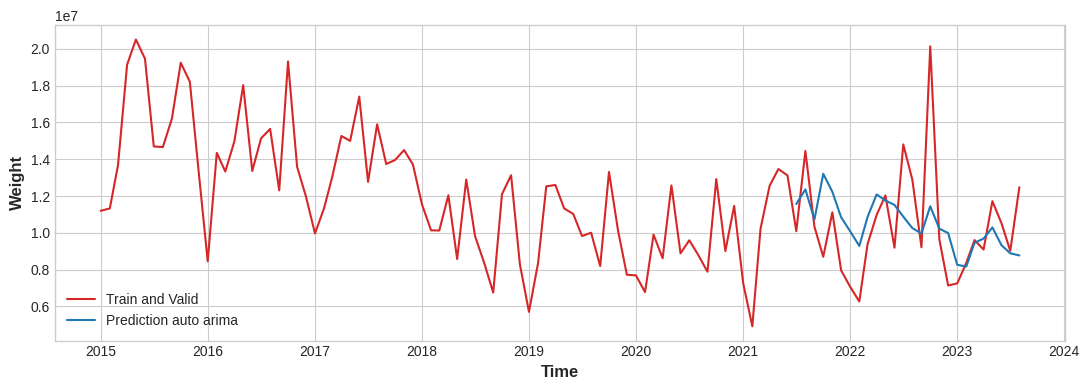

In [ ]:
auto_arima_model2(Weight_HS22)

In [ ]:
def Holt_Winters2(df):
  s = df.columns[0]
  print(s)
  df= df[df[df.columns[0]] != 0]
  y = pd.DataFrame(df[df.columns[0]])
  train,test = train_test_split(y,train_size=0.75,shuffle=False)

  model = ExponentialSmoothing(train, trend='add',seasonal = 'mul', seasonal_periods= 12)
  fitted_model = model.fit()
  print("Alpha value from the model is ", fitted_model.params['smoothing_level'])
  print("Beta value from the model is ", fitted_model.params['smoothing_trend'])
  print("Gamma value from the model is ", fitted_model.params['smoothing_seasonal'])

  y_ses = pd.Series(fitted_model.forecast(len(test)), index=test.index)

  mape = mean_absolute_percentage_error(test, y_ses)
  print('MAPE:{}'.format(mape))
  rmse = mean_squared_error(test, y_ses, squared=False)
  print('RMSE:{}'.format(rmse))
  mae = mean_absolute_error(test, y_ses)
  print('MAE:{}'.format(mae))

  plt.plot(y,label='Train and Valid',color='C3')
  plt.plot(y_ses, label='HW Predictions',color='blue')
  plt.xlabel('Time')
  plt.ylabel('Weight')
  plt.legend(loc='upper left');
  plt.show()

22 Beverages, Spirits And Vinegar
Alpha value from the model is  0.21714285714285714
Beta value from the model is  0.0167032967032967
Gamma value from the model is  9.999999999999999e-05
MAPE:0.16632602688636353
RMSE:2815268.5233719363
MAE:1925066.862272262


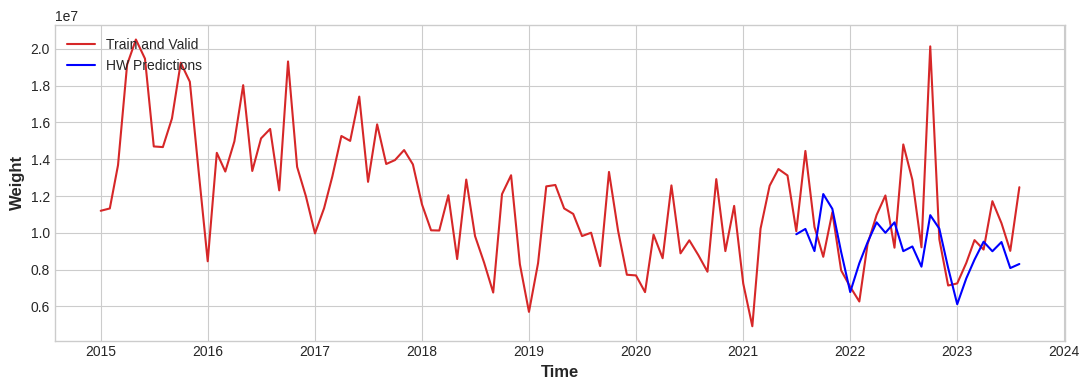

In [ ]:
Holt_Winters2(Weight_HS22)

In [ ]:
HS25 = HS2[HS2['Commodity'] == '25 Salt; Sulfur; Earth & Stone; Lime & Cement Plaster']
Weight_HS25 = pd.DataFrame(HS25.groupby('Time')['Vessel SWT (Gen) (kg)'].sum())
Weight_HS25 = Weight_HS25.resample('MS').sum().fillna(0)
Weight_HS25

Vessel SWT (Gen) (kg)
Time                             
2003-01-01            264473159.0
2003-02-01            261992327.0
2003-03-01            164888757.0
2003-04-01             14047254.0
2003-05-01             32417336.0
...                           ...
2023-04-01             27407008.0
2023-05-01               507538.0
2023-06-01             29194667.0
2023-07-01             28956787.0
2023-08-01             95758589.0

[248 rows x 1 columns]

In [ ]:
Weight_HS25.isna().sum()

Vessel SWT (Gen) (kg)    0
dtype: int64

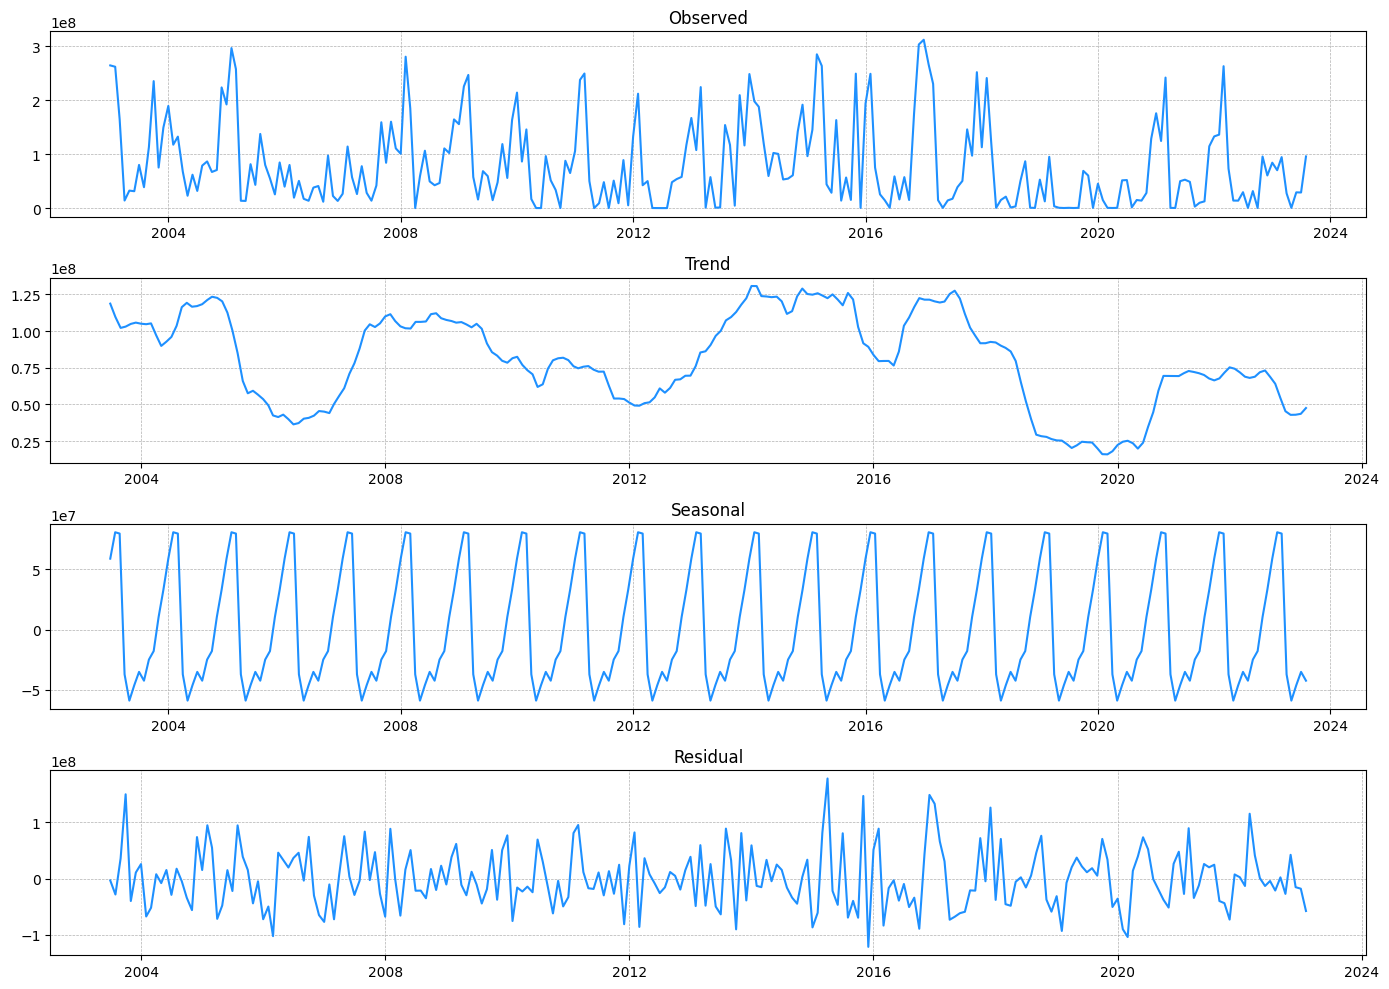

In [ ]:
temp4 = pd.Series(Weight_HS25['Vessel SWT (Gen) (kg)'].values, index=Weight_HS25.index)
temp4.index.freq = 'MS'
decomp4 = seasonal_decompose(temp4)

fig, axes = plt.subplots(4, 1, figsize=(14, 10))

axes[0].plot(decomp4.observed, color='dodgerblue')
axes[0].set_title('Observed')
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[1].plot(decomp4.trend, color='dodgerblue')
axes[1].set_title('Trend')
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[2].plot(decomp4.seasonal, color='dodgerblue')
axes[2].set_title('Seasonal')
axes[2].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[3].plot(decomp4.resid, color='dodgerblue')
axes[3].set_title('Residual')
axes[3].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

Vessel SWT (Gen) (kg)
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=8.55 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=7310.313, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=7261.226, Time=0.90 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=7269.792, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=7461.696, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=7272.778, Time=0.05 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=7260.246, Time=1.07 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=7260.572, Time=0.67 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=7263.224, Time=0.35 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=7300.047, Time=0.46 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=7262.307, Time=1.19 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=7260.684, Time=0.58 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=7270.104, Time=0.71 sec
 ARIMA(2,0,1)(2,0,0)[12] intercept   : AIC=7260.374, Time=2.50 sec
 A

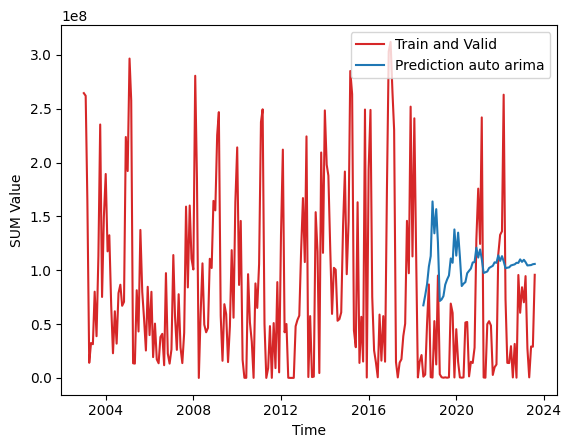

In [ ]:
auto_arima_model(Weight_HS25)

In [ ]:
Weight_HS25 = Weight_HS25.fillna(0)
Weight_HS25.isna().sum()

Vessel SWT (Gen) (kg)    0
dtype: int64

In [ ]:
Weight_HS25 = Weight_HS25.fillna(0)
Holt_Winters(Weight_HS25)

Vessel SWT (Gen) (kg)
Alpha value from the model is  0.14642857142857144
Beta value from the model is  0.013311688311688313
Gamma value from the model is  0.13131868131868132


ValueError: Input contains NaN.

# Origin Countries

In [ ]:
# Most Value Region
top5_value_CO = HS2.groupby('Country')['Customs Containerized Vessel Value (Gen) ($US)'].sum().nlargest(5).index
filtered_CO = HS2[HS2['Country'].isin(top5_value_CO)]
SUM_values_CO = filtered_CO.groupby(['Time','Country'])['Customs Containerized Vessel Value (Gen) ($US)'].sum().unstack()

In [ ]:
SUM_values_CO.fillna(0)

In [ ]:
colors = ['b', 'g', 'r', 'c', 'm']

plt.figure(figsize=(15,6))

for country in SUM_values_CO.columns:
  plt.plot(SUM_values_CO.index, SUM_values_CO[country], label=f'{country}')

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.xlabel('Time')
plt.ylabel('SUM Value')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Most Weigth Region
top5_WGT_CO = HS2.groupby('Country')['Containerized Vessel SWT (Gen) (kg)'].sum().nlargest(5).index
filtered_WGT_CO = HS2[HS2['Country'].isin(top5_WGT_CO)]
SUM_WGT_CO = filtered_WGT_CO.groupby(['Time','Country'])['Containerized Vessel SWT (Gen) (kg)'].sum().unstack()

In [ ]:
SUM_WGT_CO

In [ ]:
colors = ['b', 'g', 'r', 'c', 'm']

plt.figure(figsize=(15,6))

for country in SUM_WGT_CO.columns:
  plt.plot(SUM_WGT_CO.index, SUM_WGT_CO[country], label=f'{country}')

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.xlabel('Time')
plt.ylabel('SUM Weight')
plt.legend(loc='upper left')
plt.show()

In [ ]:
EU = HS2[HS2['Country'] == 'Europe']
EU

In [ ]:
top5_EU_WGT = EU.groupby('Commodity')['Containerized Vessel SWT (Gen) (kg)'].sum().nlargest(5).index
filtered_EU_WGT = EU[EU['Commodity'].isin(top5_EU_WGT)]
SUM_WGT_EU = filtered_EU_WGT.groupby(['Time','Commodity'])['Containerized Vessel SWT (Gen) (kg)'].sum().unstack()
SUM_WGT_EU.fillna(0)

In [ ]:
import random
def random_color():
  return (random.random(),random.random(),random.random())

plt.figure(figsize=(15,8))

for commodity in SUM_WGT_EU.columns:
  plt.plot(SUM_WGT_EU.index, SUM_WGT_EU[commodity], label=f'Commodity {commodity}', color=random_color())

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.xlabel('Time')
plt.ylabel('SUM Weight')
plt.legend(loc='upper left')
plt.show()

In [ ]:
HS27_Country = HS27.groupby(['Time','Country'])['Vessel Customs Value (Gen) ($US)'].sum()
HS27_Country = HS27_Country.reset_index()
pivot_df = HS27_Country.pivot(index='Time',columns='Country',values='Vessel Customs Value (Gen) ($US)')
pivot_df = pivot_df.fillna(0)
pivot_df

In [ ]:
# Value - Country for Commodity 27
import random
def random_color():
  return (random.random(),random.random(),random.random())

plt.figure(figsize=(15,8))

for country in pivot_df.columns:
  plt.plot(pivot_df.index, pivot_df[country], label=f'Country {country}', color=random_color())

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.xlabel('Time')
plt.ylabel('SUM Value')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Weight - Country for HS27
HS27_WGT_COO = HS27.groupby(['Time','Country'])['Vessel SWT (Gen) (kg)'].sum()
HS27_WGT_COO = HS27_WGT_COO.reset_index()
pivot_WGT = HS27_WGT_COO.pivot(index='Time',columns='Country',values='Vessel SWT (Gen) (kg)')
pivot_WGT = pivot_WGT.fillna(0)
pivot_WGT

In [ ]:
plt.figure(figsize=(15,8))

for country in pivot_WGT.columns:
  plt.plot(pivot_WGT.index, pivot_WGT[country], label=f'Country {country}', color=random_color())

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.xlabel('Time')
plt.ylabel('SUM Weight')
plt.legend(loc='upper left')
plt.show()

# HS4

In [ ]:
df = pd.read_csv('boston_census_hs4_v2.csv')

In [ ]:
df.info()
df

In [ ]:
df['I_COMMODITY'] = df['I_COMMODITY'].astype(str).str.zfill(4)
df

In [ ]:
df['time'] = pd.to_datetime(df['YEAR'].astype(str)+'-'+df['MONTH'].astype(str))
df

In [ ]:
df.isna().sum()

In [ ]:
top5value_HS4 = df.groupby('I_COMMODITY')['CNT_VAL_MO'].sum().nlargest(5).index
top5value_HS4

In [ ]:
filtered_HS4 = df[df['I_COMMODITY'].isin(top5value_HS4)]
filtered_HS4

In [ ]:
HS4_values = filtered_HS4.groupby(['time','I_COMMODITY'])['CNT_VAL_MO'].sum().unstack()
HS4_values = HS4_values.fillna(0)
HS4_values

In [ ]:
import random
def random_color():
  return (random.random(),random.random(),random.random())

plt.figure(figsize=(15,6))

for commodity in HS4_values.columns:
  plt.plot(HS4_values.index, HS4_values[commodity], label=f'Commodity {commodity}',color=random_color())

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.xlabel('Time')
plt.ylabel('SUM Value')
plt.legend(loc='upper left')
plt.show()

In [ ]:
filtered_HS4_2 = filtered_HS4[filtered_HS4['CTY_CODE'] == '-']
filtered_HS4_2

In [ ]:
HS4_values_2 = filtered_HS4_2.groupby(['time','I_COMMODITY'])['CNT_VAL_MO'].sum().unstack()
HS4_values_2 = HS4_values_2.fillna(0)
HS4_values_2

In [ ]:
plt.figure(figsize=(15,6))

for commodity in HS4_values_2.columns:
  plt.plot(HS4_values_2.index, HS4_values_2[commodity], label=f'Commodity {commodity}',color=random_color())

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.xlabel('Time')
plt.ylabel('SUM Value')
plt.legend(loc='upper left')
plt.show()

In [ ]:
%%shell
jupyter nbconvert --to html ///content/Commodities.ipynb

# SCM 256

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from warnings import simplefilter

from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import DeterministicProcess

In [ ]:
df = pd.read_excel('https://www.dropbox.com/scl/fi/kpm55wa4tebambwtvjwtw/Massport_monthly_HS_2-digit_Import_2003-2023_by_Region.xlsx?rlkey=zhpsqk7micnplcl0xj9i76xjn&dl=1')
df

In [ ]:
df[['Country','Containerized Vessel SWT (Gen) (kg)']].groupby('Country').sum('Containerized Vessel SWT (Gen) (kg)').sort_values('Containerized Vessel SWT (Gen) (kg)', ascending=False)

In [ ]:
df_Europe = df[df['Country']=='Europe']
df_EU_WGT = df_Europe[['Time','Containerized Vessel SWT (Gen) (kg)']].groupby('Time').sum()

In [ ]:
df_EU_WGT['Month'] = np.arange(0, len(df_EU_WGT.index))
df_EU_WGT

In [ ]:
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Month', 'Containerized Vessel SWT (Gen) (kg)', data=df_EU_WGT, color='0.75')
ax = sns.regplot(x='Month', y='Containerized Vessel SWT (Gen) (kg)', data=df_EU_WGT, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Monthly Containerized Vessel SWT (Gen) (kg) imported from Asia-Other');

In [ ]:
df_AsiaOther = df[df['Country']=='Asia - Other']
df_AO_WGT = df_AsiaOther[['Time','Containerized Vessel SWT (Gen) (kg)']].groupby('Time').sum()

In [ ]:
df_AO_WGT['Month'] = np.arange(0, len(df_AO_WGT.index))
df_AO_WGT

In [ ]:
X = df_AO_WGT.loc[:, ['Month']]  # features
y = df_AO_WGT.loc[:, 'Containerized Vessel SWT (Gen) (kg)']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

In [ ]:
model.coef_

In [ ]:
model.intercept_

In [ ]:
simplefilter("ignore")

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

In [ ]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Containerized Weight(kg) from Asia-Other');

In [ ]:
df_AO_WGT['Lag_1'] = df_AO_WGT['Containerized Vessel SWT (Gen) (kg)'].shift(1)

df_AO_WGT.head()

In [ ]:
X = df_AO_WGT.loc[:, ['Lag_1']]
X.dropna(inplace=True)
y = df_AO_WGT.loc[:, 'Containerized Vessel SWT (Gen) (kg)']
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

In [ ]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('Containerized Vessel SWT (Gen) (kg)')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Containerized Weight(kg) from Asia-Other');

There seems to be a lag affection. I also ran the data from Europe, not so significant.

In [ ]:
ax = y.plot(**plot_params)
ax = y_pred.plot()

In [ ]:
df_AO_WGT_MA = df_AO_WGT[['Containerized Vessel SWT (Gen) (kg)']]

In [ ]:
moving_average = df_AO_WGT_MA.rolling(
    window=12,
    center=True,      # puts the average at the center of the window
    min_periods=6,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

ax = df_AO_WGT_MA.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Asia-Other Containerized Weight(kg): 12-Month Moving Average", legend=False,
);

In [ ]:
dp = DeterministicProcess(
    index=df_AO_WGT_MA.index,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=1,             # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
)
# `in_sample` creates features for the dates given in the `index` argument
X = dp.in_sample()

X.head()

In [ ]:
y = df_AO_WGT_MA["Containerized Vessel SWT (Gen) (kg)"]

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

In [ ]:
y_pred.tail(5)

In [ ]:
ax = df_AO_WGT_MA.plot(style=".", color="0.5", title="Monthly Containerized Weight(kg) from Asia-Other - Linear Trend")
_ = y_pred.plot(ax=ax, linewidth=3, label="Trend")

In [ ]:
X = dp.out_of_sample(steps=16)

y_fore = pd.Series(model.predict(X), index=X.index).to_frame('Containerized Vessel SWT (Gen) (kg)').reset_index()
#Set date as index for predictions
def add_timeindex(row):
    return pd.to_datetime('2002-12-01') + pd.DateOffset(months=row['index'])
y_fore['Month'] = y_fore.apply(add_timeindex,axis=1)
y_fore = y_fore.set_index('Month').drop('index',axis=1)

y_fore.head()

In [ ]:
ax = df_AO_WGT_MA["2003-01-01":].plot(title="Monthly Weight(kg) from EU - Linear Trend Forecast", **plot_params)
ax = y_pred["2003-01-01":].plot(ax=ax, linewidth=3, label="Trend")
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color="C3")
_ = ax.legend()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess


#Configure plot styles

import warnings

import matplotlib.pyplot as plt
from IPython import get_ipython

warnings.simplefilter("ignore")

plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

get_ipython().config.InlineBackend.figure_format = 'retina'


#Plot seasonality of data
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette(
        "husl",
        n_colors=X[period].nunique(),
    )
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax

def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax


def lagplot(x, y=None, shift=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(shift)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    title = f"Lag {shift}" if shift > 0 else f"Lead {shift}"
    ax.set(title=f"Lag {shift}", xlabel=x_.name, ylabel=y_.name)
    return ax

#Function to plot lags
def plot_lags(x,
              y=None,
              lags=6,
              leads=None,
              nrows=1,
              lagplot_kwargs={},
              **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    orig = leads is not None
    leads = leads or 0
    kwargs.setdefault('ncols', math.ceil((lags + orig + leads) / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        k -= leads + orig
        if k + 1 <= lags:
            ax = lagplot(x, y, shift=k + 1, ax=ax, **lagplot_kwargs)
            title = f"Lag {k + 1}" if k + 1 >= 0 else f"Lead {-k - 1}"
            ax.set_title(title, fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig

plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

In [ ]:
X = df_AO_WGT_MA.copy()

X["month"] = X.index.month  # the x-axis (freq)
X["year"] = X.index.year  # the seasonal period (period)

#X["week"] = X.index.week
#X["quarter"] = X.index.quarter

fig, ax = plt.subplots(1, 1, figsize=(11, 6))
seasonal_plot(X, y="Containerized Vessel SWT (Gen) (kg)", period="year", freq="month", ax=ax)

In [ ]:
plot_periodogram(df_AO_WGT_MA["Containerized Vessel SWT (Gen) (kg)"]);

In [ ]:
from statsmodels.tsa.deterministic import DeterministicProcess

data = df_AO_WGT_MA.to_period('M')

dp = DeterministicProcess(
    index=data.index,
    constant=True,               # dummy feature for bias (y-intercept)
    order=1,                     # trend (order 1 means linear)
    seasonal=True,               # weekly seasonality (indicators)
    drop=True,                   # drop terms to avoid collinearity
)

X = dp.in_sample()  # create features for weeks

In [ ]:
y = df_AO_WGT_MA["Containerized Vessel SWT (Gen) (kg)"]

model = LinearRegression(fit_intercept=False)
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)
X_fore = dp.out_of_sample(steps=16) #index in number, not future time periods
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(color='0.25', style='.', title="Monthly Weight(kg) - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='C3')
_ = ax.legend()

# accurate forecasts

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

import warnings

import matplotlib.pyplot as plt
from IPython import get_ipython

warnings.simplefilter("ignore")

plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

get_ipython().config.InlineBackend.figure_format = 'retina'


#Plot seasonality of data
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette(
        "husl",
        n_colors=X[period].nunique(),
    )
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax

def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax


def lagplot(x, y=None, shift=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(shift)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    title = f"Lag {shift}" if shift > 0 else f"Lead {shift}"
    ax.set(title=f"Lag {shift}", xlabel=x_.name, ylabel=y_.name)
    return ax

#Function to plot lags
def plot_lags(x,
              y=None,
              lags=6,
              leads=None,
              nrows=1,
              lagplot_kwargs={},
              **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    orig = leads is not None
    leads = leads or 0
    kwargs.setdefault('ncols', math.ceil((lags + orig + leads) / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        k -= leads + orig
        if k + 1 <= lags:
            ax = lagplot(x, y, shift=k + 1, ax=ax, **lagplot_kwargs)
            title = f"Lag {k + 1}" if k + 1 >= 0 else f"Lead {-k - 1}"
            ax.set_title(title, fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig

plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

In [ ]:
df2 = pd.read_excel('https://www.dropbox.com/scl/fi/kpm55wa4tebambwtvjwtw/Massport_monthly_HS_2-digit_Import_2003-2023_by_Region.xlsx?rlkey=zhpsqk7micnplcl0xj9i76xjn&dl=1',
    usecols=['Commodity', 'Country', 'Time', 'Customs Containerized Vessel Value (Gen) ($US)', 'Containerized Vessel SWT (Gen) (kg)'],
    dtype={
        'Commodity': 'category',
        'Country': 'category',
        'Customs Containerized Vessel Value (Gen) ($US)': 'float',
        'Containerized Vessel SWT (Gen) (kg)': 'float',
    },
    parse_dates=['Time'])
#Convert days to period type.
df2['Time'] = df2['Time'].dt.to_period('M')
df2_AO = df2[df2['Country']=='Asia - Other']
#Set index of dataframe sorted by store_nbr, product-family-id and the date.
df2_AO = df2_AO.set_index(['Country', 'Commodity', 'Time']).sort_index()
df2_AO.head(5)

In [ ]:
commodity_AO = (
    df2_AO
    .groupby(['Commodity', 'Time']).sum()
    .unstack('Commodity')
)
commodity_AO.head(5)

In [ ]:
df2_AO_sum = (
    df2_AO
    .groupby('Time').sum()
)
df2_AO_sum.head(5)

In [ ]:
COM_22 = commodity_AO.loc(axis=1)[:, '22 Beverages, Spirits And Vinegar']
y = COM_22.loc[:, 'Containerized Vessel SWT (Gen) (kg)'].squeeze() #Squeeze data from data-frame into pandas series.
y

In [ ]:
y.plot.line()

In [ ]:
fourier = CalendarFourier(freq='Y',order=12)
dp = DeterministicProcess(
    constant=True,
    index=y.index,
    order=1,
    seasonal=True,
    drop=True,
    additional_terms=[fourier],
)
X_time = dp.in_sample()
#Add one-hot feature for new years day.
X_time['NewYearsMonth'] = (X_time.index.month == 1)

model = LinearRegression(fit_intercept=False)
model.fit(X_time, y)
y_deseason = y - model.predict(X_time)
y_deseason.name = 'weight_deseasoned'

ax = y_deseason.plot()
ax.set_title("Weight of 22 Beverage (deseasonalized)");

In [ ]:
y_ma = y.rolling(
    window=12,
    center=True,
).mean()

# Plot
ax = y_ma.plot()
ax.set_title("12-Month Moving Average");

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from statsmodels.tsa.seasonal import seasonal_decompose

from xgboost import XGBRegressor

import warnings
warnings.simplefilter("ignore")

from IPython import get_ipython
get_ipython().config.InlineBackend.figure_format = 'retina'

#Configure plot styles

plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)


In [ ]:
# Define lag plot
def lagplot(x, y=None, shift=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(shift)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    title = f"Lag {shift}" if shift > 0 else f"Lead {shift}"
    ax.set(title=f"Lag {shift}", xlabel=x_.name, ylabel=y_.name)
    return ax

In [ ]:
#Function to plot lags
def plot_lags(x,
              y=None,
              lags=6,
              leads=None,
              nrows=1,
              lagplot_kwargs={},
              **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    orig = leads is not None
    leads = leads or 0
    kwargs.setdefault('ncols', math.ceil((lags + orig + leads) / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        k -= leads + orig
        if k + 1 <= lags:
            ax = lagplot(x, y, shift=k + 1, ax=ax, **lagplot_kwargs)
            title = f"Lag {k + 1}" if k + 1 >= 0 else f"Lead {-k - 1}"
            ax.set_title(title, fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig

In [ ]:
plot_acf(y_deseason, lags=12);

In [ ]:
plot_pacf(y_deseason, lags=12);
plot_lags(y_deseason, lags=12, nrows=3);

# BoostedHybrid

In [ ]:
class BoostedHybrid:
    def __init__(self, model_1, model_2):
        self.model_1 = model_1
        self.model_2 = model_2 # Model 2 trains on the residuals of the forecast of model_1
        self.y_columns = None  # store column names from fit method


    def fit(self, X_1, X_2, y):
        # Train model_1
        self.model_1.fit(X_1, y)

        # Make predictions
        y_fit = pd.DataFrame(
            self.model_1.predict(X_1),
            index=X_1.index, columns=y.columns,
        )

        # Compute residuals
        y_resid = y - y_fit
        y_resid = y_resid.stack().squeeze() # wide to long

        # Train model_2 on residuals
        self.model_2.fit(X_2, y_resid)

        # Save column names for predict method
        self.y_columns = y.columns

        self.y_fit = y_fit
        self.y_resid = y_resid

    def predict(self, X_1, X_2):
        # Predict with model_1
        y_pred = pd.DataFrame(
            self.model_1.predict(X_1),
            index=X_1.index, columns=self.y_columns,
        )
        y_pred = y_pred.stack().squeeze()  # wide to long

        # Add model_2 predictions to model_1 predictions
        y_pred += self.model_2.predict(X_2)

        return y_pred.unstack()

In [ ]:
y = commodity_AO.loc[:, 'Containerized Vessel SWT (Gen) (kg)']
y

In [ ]:
y['22 Beverages, Spirits And Vinegar']

In [ ]:
dp = DeterministicProcess(index=y.index, order=1)
X_1 = dp.in_sample()

X_1

In [ ]:
X_2 = commodity_AO.drop('Customs Containerized Vessel Value (Gen) ($US)',axis=1).stack()
X_2

In [ ]:
le = LabelEncoder()
X_2 = X_2.reset_index('Commodity')
X_2['Commodity'] = le.fit_transform(X_2['Commodity'])
X_2["Month"] = X_2.index.month

X_2.drop(columns='Containerized Vessel SWT (Gen) (kg)',inplace=True)
X_2['HolidayMonth'] = np.where((X_2['Month'] == 11) | (X_2['Month'] == 12), '1', '0')
X_2

In [ ]:
model = BoostedHybrid(
    model_1=LinearRegression(),
    model_2=RandomForestRegressor(),
)
model.fit(X_1, X_2, y)

y_pred = model.predict(X_1, X_2)
y_pred = y_pred.clip(0.0)

In [ ]:
def plot_model_results(model):
    y_train, y_valid = y[:"2020-06"], y["2020-07":]
    X1_train, X1_valid = X_1[:"2020-06"], X_1["2020-07":]
    X2_train, X2_valid = X_2.loc[:"2020-06"], X_2.loc["2020-07":]

    # Some of the algorithms above do best with certain kinds of
    # preprocessing on the features (like standardization), but this is
    # just a demo.
    model.fit(X1_train, X2_train, y_train)
    y_fit = model.predict(X1_train, X2_train).clip(0.0) #.clip(0.0) removes negative values
    y_pred = model.predict(X1_valid, X2_valid).clip(0.0) #.clip(0.0) removes negative values

    commodity = y.columns[20:21]
    axs = y.loc(axis=1)[commodity].plot(
        subplots=True, sharex=True, figsize=(11, 5), **plot_params, alpha=0.5,
    )
    _ = y_fit.loc(axis=1)[commodity].plot(subplots=True, sharex=True, color='C0', ax=axs)
    _ = y_pred.loc(axis=1)[commodity].plot(subplots=True, sharex=True, color='C3', ax=axs)
    for ax, family in zip(axs, commodity):
        ax.legend([])
        ax.set_ylabel(family)
plot_model_results(model)

In [ ]:
# NO other variables, maybe need economic variables

# SCM256 NEW

## Setting up workplace

In [ ]:
# Setup notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from statsmodels.tsa.seasonal import seasonal_decompose

from xgboost import XGBRegressor

import warnings
warnings.simplefilter("ignore")

from IPython import get_ipython
get_ipython().config.InlineBackend.figure_format = 'retina'

#Configure plot styles

plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)


## Defining Plots

In [ ]:
# Define lag plot
def lagplot(x, y=None, shift=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(shift)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    title = f"Lag {shift}" if shift > 0 else f"Lead {shift}"
    ax.set(title=f"Lag {shift}", xlabel=x_.name, ylabel=y_.name)
    return ax


In [ ]:
#Function to plot lags
def plot_lags(x,
              y=None,
              lags=6,
              leads=None,
              nrows=1,
              lagplot_kwargs={},
              **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    orig = leads is not None
    leads = leads or 0
    kwargs.setdefault('ncols', math.ceil((lags + orig + leads) / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        k -= leads + orig
        if k + 1 <= lags:
            ax = lagplot(x, y, shift=k + 1, ax=ax, **lagplot_kwargs)
            title = f"Lag {k + 1}" if k + 1 >= 0 else f"Lead {-k - 1}"
            ax.set_title(title, fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig

## Value - time series as features

In [ ]:
SUM_values['84Nuclear_39Plastics'] = SUM_values['39 Plastics And Articles Thereof']+SUM_values['84 Nuclear Reactors, Boilers, Machinery Etc.; Parts']

In [ ]:
top_value = SUM_values['03 Fish, Crustaceans & Aquatic Invertebrates']
top_value = top_value[top_value.index > pd.Timestamp('2014-12-01')]
y = top_value.loc[:].squeeze() #Squeeze data from data-frame into pandas series.
y

Time
2015-01-01    50143258.0
2015-02-01    45521826.0
2015-03-01    38610524.0
2015-04-01    11313390.0
2015-05-01    21925023.0
                 ...    
2023-04-01    25437932.0
2023-05-01    34502535.0
2023-06-01    27687079.0
2023-07-01    32756416.0
2023-08-01    35324050.0
Name: 03 Fish, Crustaceans & Aquatic Invertebrates, Length: 104, dtype: float64

<Axes: xlabel='Time'>

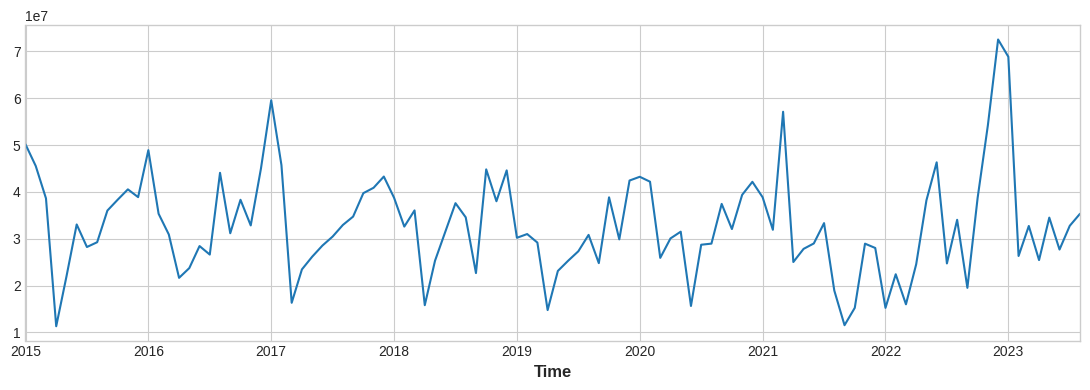

In [ ]:
y.plot.line()

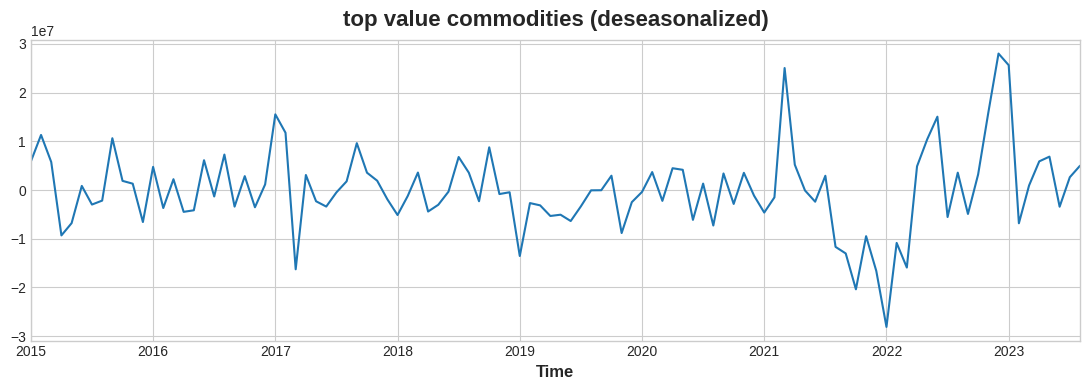

In [ ]:
# Monthly basis per year
fourier = CalendarFourier(freq='Y', order=12)
dp = DeterministicProcess(
    constant=True,
    index=y.index,
    order=1,
    seasonal=True,
    drop=True,
    additional_terms=[fourier],
)
X_time = dp.in_sample()
#Add one-hot feature for Christmas.
X_time['Christmas'] = (X_time.index.month.isin([9, 10, 11]))

model = LinearRegression(fit_intercept=False)
model.fit(X_time, y)
y_deseason = y - model.predict(X_time)
y_deseason.name = 'value_deseasoned'

ax = y_deseason.plot()
ax.set_title("top value commodities (deseasonalized)");

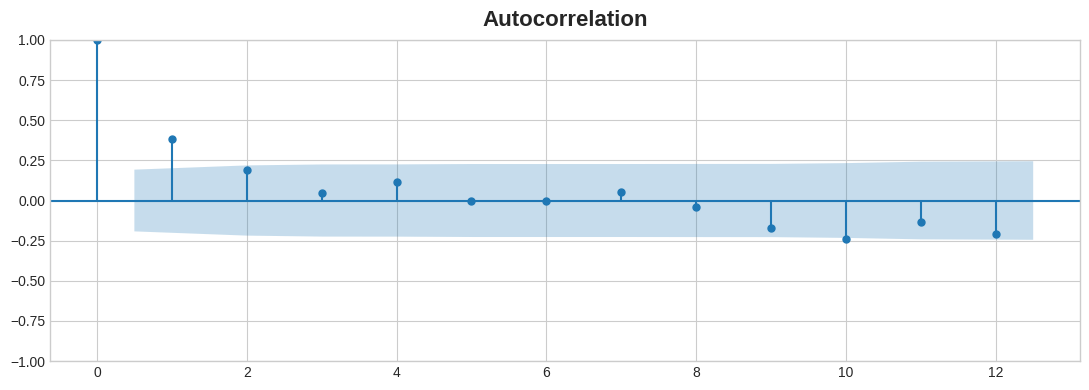

In [ ]:
plot_acf(y_deseason, lags=12);

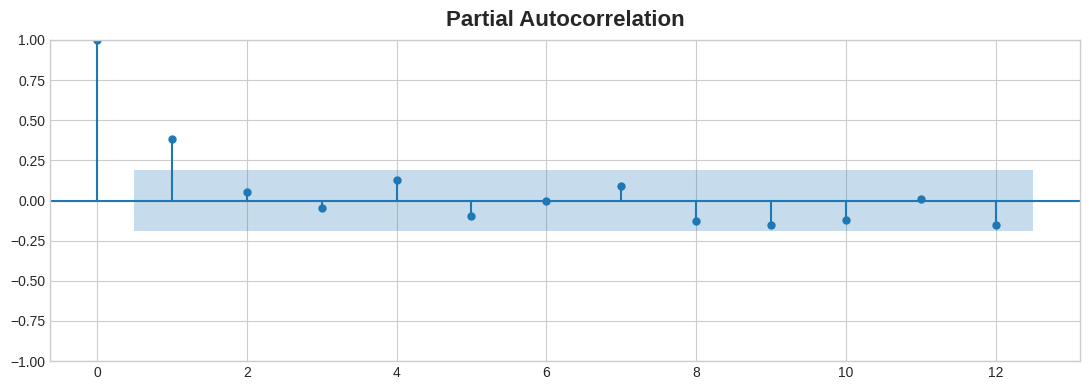

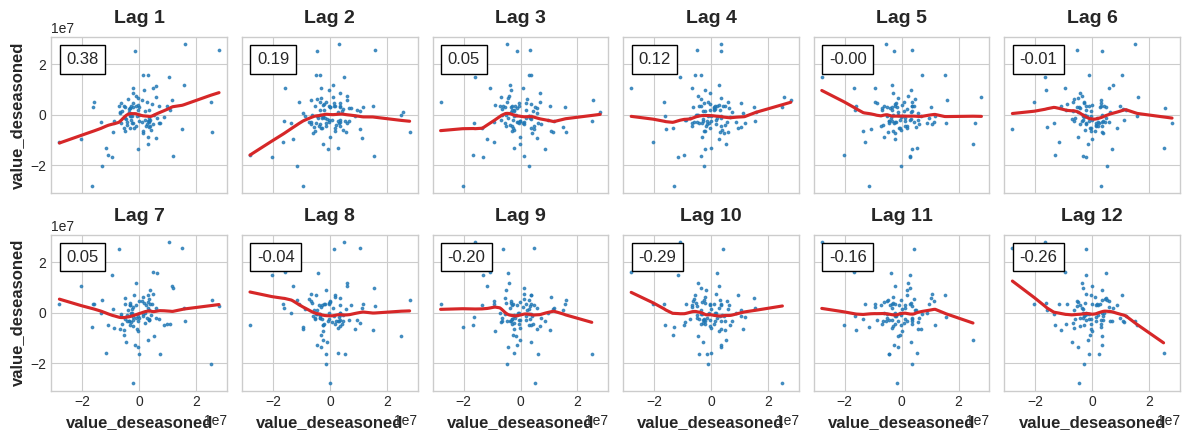

In [ ]:
plot_pacf(y_deseason, lags=12);
plot_lags(y_deseason, lags=12, nrows=2);

In [ ]:
# create dataframe with n='lags' lags with 'lag_time' and prefixed by 'name'
def make_lags(ts, lags, lag_time=1, name='y'):
    return pd.concat(
        {f'{name}_lag_{i}': ts.shift(i)
         for i in range(lag_time, lags + lag_time)},
        axis=1)

X_lags = make_lags(y_deseason, lags=1, name='y_deseason')

X = pd.concat([X_time, X_lags], axis=1).dropna()

# align y with X based on the index (date) and use inner join -- e.g. drop values from y, for which X has a empty (NaN) value
y, X = y.align(X, join='inner')

In [ ]:
X

const  trend  s(2,12)  s(3,12)  s(4,12)  s(5,12)  s(6,12)  \
Time                                                                    
2015-02-01    1.0    2.0      1.0      0.0      0.0      0.0      0.0   
2015-03-01    1.0    3.0      0.0      1.0      0.0      0.0      0.0   
2015-04-01    1.0    4.0      0.0      0.0      1.0      0.0      0.0   
2015-05-01    1.0    5.0      0.0      0.0      0.0      1.0      0.0   
2015-06-01    1.0    6.0      0.0      0.0      0.0      0.0      1.0   
...           ...    ...      ...      ...      ...      ...      ...   
2023-04-01    1.0  100.0      0.0      0.0      1.0      0.0      0.0   
2023-05-01    1.0  101.0      0.0      0.0      0.0      1.0      0.0   
2023-06-01    1.0  102.0      0.0      0.0      0.0      0.0      1.0   
2023-07-01    1.0  103.0      0.0      0.0      0.0      0.0      0.0   
2023-08-01    1.0  104.0      0.0      0.0      0.0      0.0      0.0   

            s(7,12)  s(8,12)  s(9,12)  ...  cos(2,freq=A-DEC)  \
Time                                   ...                      
2015-02-01      0.0      0.0      0.0  ...           0.482508   
2015-03-01      0.0      0.0      0.0  ...          -0.444378   
2015-04-01      0.0      0.0      0.0  ...          -0.999074   
2015-05-01      0.0      0.0      0.0  ...          -0.548843   
2015-06-01      0.0      0.0      0.0  ...           0.467359   
...             ...      ...      ...  ...                ...   
2023-04-01      0.0      0.0      0.0  ...          -0.999074   
2023-05-01      0.0      0.0      0.0  ...          -0.548843   
2023-06-01      0.0      0.0      0.0  ...           0.467359   
2023-07-01      1.0      0.0      0.0  ...           0.998667   
2023-08-01      0.0      1.0      0.0  ...           0.527078   

            sin(3,freq=A-DEC)  cos(3,freq=A-DEC)  sin(4,freq=A-DEC)  \
Time                                                                  
2015-02-01           0.999546          -0.030120           0.845249   
2015-03-01           0.094537          -0.995521          -0.796183   
2015-04-01          -0.997917          -0.064508          -0.085965   
2015-05-01          -0.085965           0.996298           0.917584   
2015-06-01           0.998435           0.055917          -0.826354   
...                       ...                ...                ...   
2023-04-01          -0.997917          -0.064508          -0.085965   
2023-05-01          -0.085965           0.996298           0.917584   
2023-06-01           0.998435           0.055917          -0.826354   
2023-07-01           0.077386          -0.997001          -0.103102   
2023-08-01          -0.998880          -0.047321           0.895839   

            cos(4,freq=A-DEC)  sin(5,freq=A-DEC)  cos(5,freq=A-DEC)  \
Time                                                                  
2015-02-01          -0.534373           0.455907          -0.890028   
2015-03-01          -0.605056          -0.933837           0.357698   
2015-04-01           0.996298           0.994218           0.107381   
2015-05-01          -0.397543          -0.785650          -0.618671   
2015-06-01          -0.563151           0.417194           0.908818   
...                       ...                ...                ...   
2023-04-01           0.996298           0.994218           0.107381   
2023-05-01          -0.397543          -0.785650          -0.618671   
2023-06-01          -0.563151           0.417194           0.908818   
2023-07-01           0.994671           0.128748          -0.991677   
2023-08-01          -0.444378          -0.566702           0.823923   

            sin(6,freq=A-DEC)  Christmas  y_deseason_lag_1  
Time                                                        
2015-02-01          -0.060213      False      5.862728e+06  
2015-03-01          -0.188227      False      1.131111e+07  
2015-04-01           0.128748      False      5.752697e+06  
2015-05-01          -0.171293      False     -9.315281e+06  
20

Training RMSE: 6286089.40615
Validation RMSE: 14145470.81314
Training MAPE %: 17.25219
Validation MAPE %: 39.07228


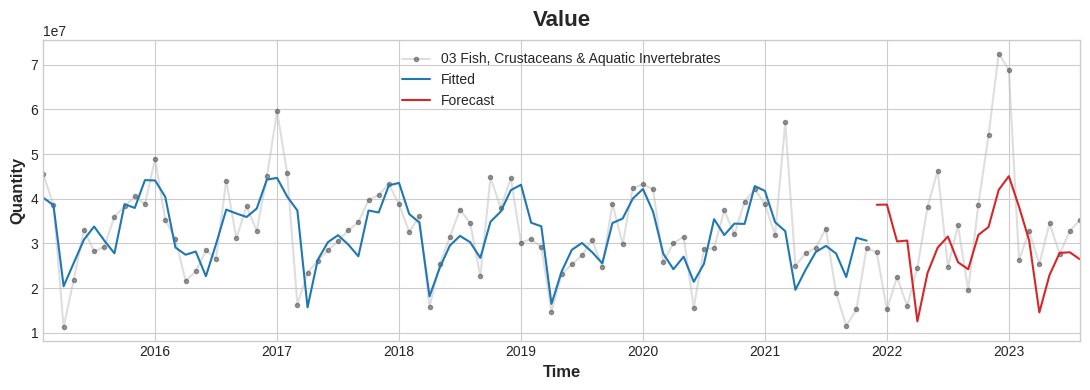

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression(fit_intercept=False).fit(X_train, y_train)
y_fit = pd.Series(model.predict(X_train), index=X_train.index).clip(0.0) #.clip(0.0) removes negative values
y_pred = pd.Series(model.predict(X_valid), index=X_valid.index).clip(0.0) #.clip(0.0) removes negative values

rmse_train = mean_squared_error(y_train, y_fit, squared=False)
rmse_valid = mean_squared_error(y_valid, y_pred, squared=False)
mape_train = mean_absolute_percentage_error(y_train, y_fit) * 100
mape_valid = mean_absolute_percentage_error(y_valid, y_pred) * 100
print(f'Training RMSE: {rmse_train:.5f}')
print(f'Validation RMSE: {rmse_valid:.5f}')
print(f'Training MAPE %: {mape_train:.5f}')
print(f'Validation MAPE %: {mape_valid:.5f}')

ax = y.plot(**plot_params, alpha=0.5, title="Value", ylabel="Quantity")
ax = y_fit.plot(ax=ax, label="Fitted", color='C0')
ax = y_pred.plot(ax=ax, label="Forecast", color='C3')
ax.legend();

## Boosted Hybrid again

In [ ]:
class BoostedHybrid:
    def __init__(self, model_1, model_2):
        self.model_1 = model_1
        self.model_2 = model_2 # Model 2 trains on the residuals of the forecast of model_1
        self.y_columns = None  # store column names from fit method


    def fit(self, X_1, X_2, y):
        # Train model_1
        self.model_1.fit(X_1, y)

        # Make predictions
        y_fit = pd.DataFrame(
            self.model_1.predict(X_1),
            index=X_1.index, columns=y.columns,
        )

        # Compute residuals
        y_resid = y - y_fit
        y_resid = y_resid.stack().squeeze() # wide to long

        # Train model_2 on residuals
        self.model_2.fit(X_2, y_resid)

        # Save column names for predict method
        self.y_columns = y.columns

        self.y_fit = y_fit
        self.y_resid = y_resid

    def predict(self, X_1, X_2):
        # Predict with model_1
        y_pred = pd.DataFrame(
            self.model_1.predict(X_1),
            index=X_1.index, columns=self.y_columns,
        )
        y_pred = y_pred.stack().squeeze()  # wide to long

        # Add model_2 predictions to model_1 predictions
        y_pred += self.model_2.predict(X_2)

        return y_pred.unstack()



In [ ]:
y = SUM_values
y = y.loc['2015-02-01':]
y

Commodity   03 Fish, Crustaceans & Aquatic Invertebrates  \
Time                                                       
2015-02-01                                    45521826.0   
2015-03-01                                    38610524.0   
2015-04-01                                    11313390.0   
2015-05-01                                    21925023.0   
2015-06-01                                    33038736.0   
...                                                  ...   
2023-04-01                                    25437932.0   
2023-05-01                                    34502535.0   
2023-06-01                                    27687079.0   
2023-07-01                                    32756416.0   
2023-08-01                                    35324050.0   

Commodity   22 Beverages, Spirits And Vinegar  \
Time                                            
2015-02-01                         24794845.0   
2015-03-01                         38568001.0   
2015-04-01                         40693359.0   
2015-05-01                         49741833.0   
2015-06-01                         51686150.0   
...                                       ...   
2023-04-01                         33497739.0   
2023-05-01                         40384107.0   
2023-06-01                         39033801.0   
2023-07-01                         29772975.0   
2023-08-01                         40149868.0   

Commodity   39 Plastics And Articles Thereof  \
Time                                           
2015-02-01                        15366101.0   
2015-03-01                        19570948.0   
2015-04-01                        17498689.0   
2015-05-01                        15563745.0   
2015-06-01                        17473478.0   
...                                      ...   
2023-04-01                        22052627.0   
2023-05-01                        25727748.0   
2023-06-01                        15645296.0   
2023-07-01                        20190060.0   
2023-08-01                        26999655.0   

Commodity   84 Nuclear Reactors, Boilers, Machinery Etc.; Parts  \
Time                                                              
2015-02-01                                         47600211.0     
2015-03-01                                         54202863.0     
2015-04-01                                         46464496.0     
2015-05-01                                         54036648.0     
2015-06-01                                         46654430.0     
...                                                       ...     
2023-04-01                                         53330039.0     
2023-05-01                                         64351866.0     
2023-06-01                                         53942981.0     
2023-07-01                                         52292641.0     
2023-08-01                                         76513296.0     

Commodity   85 Electric Machinery Etc; Sound Equip; Tv Equip; Pts  
Time                                                               
2015-02-01                                         16351068.0      
2015-03-01                                         18929609.0      
2015-04-01                                         15886178.0      
2015-05-01                                         18698092.0      
2015-06-01                                         22099165.0      
...                                                       ...      
2023-04-01                                         26138936.0      
2023-05-01                                         23862168.0      
2023-06-01                                         15986702.0      
2023-07-01                                         31984723.0      
2023-08-01                                         27236561.0      

[103 rows x 5 columns]

In [ ]:
X_1 = X
new_index = pd.to_datetime(['2015-01-01'])
new_rows = pd.DataFrame(index=new_index, columns=X_1.columns)
new_rows.loc[:] = 0
new_rows.loc['2015-01-01', 'trend'] = 1
X_1 = pd.concat([X_1, new_rows]).sort_index()
X_1 = X_1.drop(X_1.index[0])

X_1

const  trend s(2,12) s(3,12) s(4,12) s(5,12) s(6,12) s(7,12)  \
2015-02-01   1.0    2.0     1.0     0.0     0.0     0.0     0.0     0.0   
2015-03-01   1.0    3.0     0.0     1.0     0.0     0.0     0.0     0.0   
2015-04-01   1.0    4.0     0.0     0.0     1.0     0.0     0.0     0.0   
2015-05-01   1.0    5.0     0.0     0.0     0.0     1.0     0.0     0.0   
2015-06-01   1.0    6.0     0.0     0.0     0.0     0.0     1.0     0.0   
...          ...    ...     ...     ...     ...     ...     ...     ...   
2023-04-01   1.0  100.0     0.0     0.0     1.0     0.0     0.0     0.0   
2023-05-01   1.0  101.0     0.0     0.0     0.0     1.0     0.0     0.0   
2023-06-01   1.0  102.0     0.0     0.0     0.0     0.0     1.0     0.0   
2023-07-01   1.0  103.0     0.0     0.0     0.0     0.0     0.0     1.0   
2023-08-01   1.0  104.0     0.0     0.0     0.0     0.0     0.0     0.0   

           s(8,12) s(9,12)  ... cos(2,freq=A-DEC) sin(3,freq=A-DEC)  \
2015-02-01     0.0     0.0  ...          0.482508          0.999546   
2015-03-01     0.0     0.0  ...         -0.444378          0.094537   
2015-04-01     0.0     0.0  ...         -0.999074         -0.997917   
2015-05-01     0.0     0.0  ...         -0.548843         -0.085965   
2015-06-01     0.0     0.0  ...          0.467359          0.998435   
...            ...     ...  ...               ...               ...   
2023-04-01     0.0     0.0  ...         -0.999074         -0.997917   
2023-05-01     0.0     0.0  ...         -0.548843         -0.085965   
2023-06-01     0.0     0.0  ...          0.467359          0.998435   
2023-07-01     0.0     0.0  ...          0.998667          0.077386   
2023-08-01     1.0     0.0  ...          0.527078          -0.99888   

           cos(3,freq=A-DEC) sin(4,freq=A-DEC) cos(4,freq=A-DEC)  \
2015-02-01          -0.03012          0.845249         -0.534373   
2015-03-01         -0.995521         -0.796183         -0.605056   
2015-04-01         -0.064508         -0.085965          0.996298   
2015-05-01          0.996298          0.917584         -0.397543   
2015-06-01          0.055917         -0.826354         -0.563151   
...                      ...               ...               ...   
2023-04-01         -0.064508         -0.085965          0.996298   
2023-05-01          0.996298          0.917584         -0.397543   
2023-06-01          0.055917         -0.826354         -0.563151   
2023-07-01         -0.997001         -0.103102          0.994671   
2023-08-01         -0.047321          0.895839         -0.444378   

           sin(5,freq=A-DEC) cos(5,freq=A-DEC) sin(6,freq=A-DEC) Christmas  \
2015-02-01          0.455907         -0.890028         -0.060213     False   
2015-03-01         -0.933837          0.357698         -0.188227     False   
2015-04-01          0.994218          0.107381          0.128748     False   
2015-05-01          -0.78565         -0.618671         -0.171293     False   
2015-06-01          0.417194          0.908818          0.111659     False   
...                      ...               ...               ...       ...   
2023-04-01          0.994218          0.107381          0.128748     False   
2023-05-01          -0.78565         -0.618671         -0.171293     False   
2023-06-01          0.417194          0.908818          0.111659     False   
2023-07-01          0.128748         -0.991677         -0.154309     False   
2023-08-01         -0.566702          0.823923          0.094537     False   

           y_deseason_lag_1  
2015-02-01   5862728.162307  
2015-03-01  11311114.221518  
2015-04-01   5752697.221518  
2015-05-01  -9315281.207054  
2015-06-01  -6799193.921338  
...                     ...  
2023-04-01    939155.674692  
2023-05-01    5889942.24612  
2023-06-01   6858999.531835  
2023-07-01  -3423550.611021  
2023-08-01   2630680.388979  

[103 rows x 26 columns]

In [ ]:
X_2 = pd.DataFrame(SUM_values.stack())
X_2

0
Time       Commodity                                                     
2003-01-01 03 Fish, Crustaceans & Aquatic Invertebrates        29386199.0
           22 Beverages, Spirits And Vinegar                   11795099.0
           39 Plastics And Articles Thereof                     3877912.0
           84 Nuclear Reactors, Boilers, Machinery Etc.; P...  16211339.0
           85 Electric Machinery Etc; Sound Equip; Tv Equi...   8959654.0
...                                                                   ...
2023-08-01 03 Fish, Crustaceans & Aquatic Invertebrates        35324050.0
           22 Beverages, Spirits And Vinegar                   40149868.0
           39 Plastics And Articles Thereof                    26999655.0
           84 Nuclear Reactors, Boilers, Machinery Etc.; P...  76513296.0
           85 Electric Machinery Etc; Sound Equip; Tv Equi...  27236561.0

[1240 rows x 1 columns]

In [ ]:
le = LabelEncoder()
X_2 = X_2.reset_index('Commodity')
X_2['Commodity'] = le.fit_transform(X_2['Commodity'])
X_2["Month"] = X_2.index.month

X_2.drop(columns=0,inplace=True)
X_2['HolidayMonth'] = np.where((X_2['Month'] == 4) | (X_2['Month'] == 9) | (X_2['Month'] == 10) | (X_2['Month'] == 11), '1', '0')
# X_2['IfCovid'] = np.where((X_2.index >= '2020-03-01') & (X_2.index <= '2022-03-01'), '1', '0')
X_2 = X_2.loc['2015-02-01':]
X_2

Commodity  Month HolidayMonth
Time                                     
2015-02-01          0      2            0
2015-02-01          1      2            0
2015-02-01          2      2            0
2015-02-01          3      2            0
2015-02-01          4      2            0
...               ...    ...          ...
2023-08-01          0      8            0
2023-08-01          1      8            0
2023-08-01          2      8            0
2023-08-01          3      8            0
2023-08-01          4      8            0

[515 rows x 3 columns]

In [ ]:
model = BoostedHybrid(
    model_1=Ridge(),
    model_2=RandomForestRegressor(),
)
model.fit(X_1, X_2, y)

y_pred = model.predict(X_1, X_2)
y_pred = y_pred.clip(0.0)

In [ ]:
from matplotlib.ticker import AutoLocator

MAPE of train dataset: 0.14137317626028909
MAPE of test dataset: 0.44625028951870044
RMSE of train dataset: 5344153.32682677
RMSE of test dataset: 15289303.581255555
MAE of train dataset: 4094187.8591555236
MAE of test dataset: 12415543.175385317


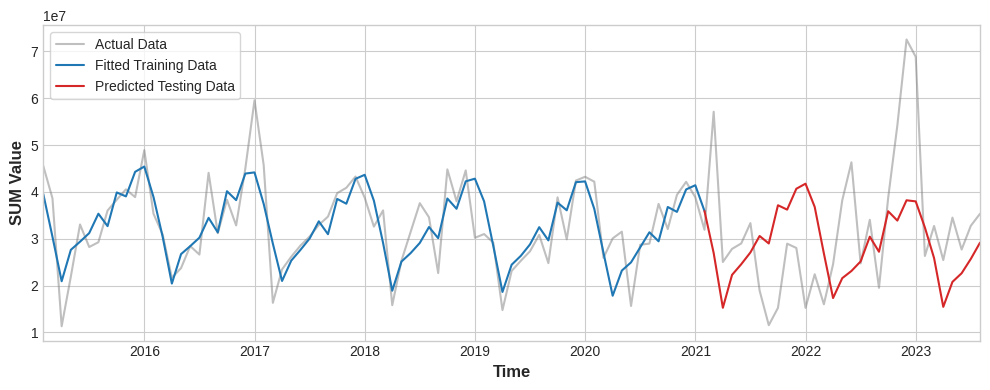

In [ ]:
def plot_model_results(model):
    #Split 2017 data into train and validation split after the 1st of July.
    y_train, y_valid = y["2015-02-01":"2021-02-01"], y["2021-02-01":]
    X1_train, X1_valid = X_1["2015-02-01":"2021-02-01"], X_1["2021-02-01" :]
    X2_train, X2_valid = X_2.loc["2015-02-01":"2021-02-01"], X_2.loc["2021-02-01":]

    # Some of the algorithms above do best with certain kinds of
    # preprocessing on the features (like standardization), but this is
    # just a demo.
    model.fit(X1_train, X2_train, y_train)
    y_fit = model.predict(X1_train, X2_train).clip(0.0) #.clip(0.0) removes negative values
    y_pred = model.predict(X1_valid, X2_valid).clip(0.0) #.clip(0.0) removes negative values

    selected_column = 0
    MAPE_train = mean_absolute_percentage_error(y_train.iloc[:, selected_column], y_fit.iloc[:, selected_column])
    MAPE_test = mean_absolute_percentage_error(y_valid.iloc[:, selected_column], y_pred.iloc[:, selected_column])
    print('MAPE of train dataset:', MAPE_train)
    print('MAPE of test dataset:', MAPE_test)
    RMSE_train = mean_squared_error(y_train.iloc[:, selected_column], y_fit.iloc[:, selected_column], squared=False)
    RMSE_test = mean_squared_error(y_valid.iloc[:, selected_column], y_pred.iloc[:, selected_column], squared=False)
    print('RMSE of train dataset:', RMSE_train)
    print('RMSE of test dataset:', RMSE_test)
    MAE_train = mean_absolute_error(y_train.iloc[:, selected_column], y_fit.iloc[:, selected_column])
    MAE_test = mean_absolute_error(y_valid.iloc[:, selected_column], y_pred.iloc[:, selected_column])
    print('MAE of train dataset:', MAE_train)
    print('MAE of test dataset:', MAE_test)

    commodity = y.columns[0]
    ax = y[commodity].plot(
    figsize=(10, 4), alpha=0.5, color='gray', label='Actual Data'
    )

    dates = pd.date_range(start=y.index.min(), end=y.index.max(), freq='YS')

    y_fit[commodity].plot(ax=ax, color='C0', label='Fitted Training Data')

    y_pred[commodity].plot(ax=ax, color='C3', label='Predicted Testing Data')

    ax.set_ylabel('SUM Value')
    ax.set_xlabel('Time')
    ax.legend(loc='upper left', frameon=True)

# # Update the legends
#     for ax in axs:
#         # This will collect the labels & handles and update the legend
#         lines, labels = ax.get_lines(), ['Actual Data', 'Fitted Training Data', 'Predicted Testing Data']
#         ax.legend(lines, labels, loc='upper left', frameon=True)
#         ax.set_xticks(dates)
#         ax.xaxis.set_major_formatter(plt.FixedFormatter(dates.strftime('%Y')))
#         ax.set_ylabel('SUM Value')
#         ax.set_xlabel('Time')
    plt.tight_layout()
    plt.show()

plot_model_results(model)

## Analyze with EBIT Increasing Rate

In [ ]:
ebit_link = 'https://www.dropbox.com/scl/fi/0qamdswm3ux8uwdjs1xuk/ebit-margins-of-main-container-shipping-companies-2014-2023.xlsx?rlkey=wa0v2n7c9vrka08xtp1co33gi&dl=1'
EBIT = pd.read_excel(ebit_link)
EBIT

In [ ]:
def monthly_rate_from_quarterly(quarterly_rate):
  quarterly_rate_decimal = quarterly_rate / 100
  return (1 + quarterly_rate_decimal) ** (1/3) - 1

monthly_data = []

for index, row in EBIT.iterrows():
  qtr, year = row['Quarter'].split(' ')
  year = int(year)
  qtr = int(qtr.replace('Q', ''))

  months = [(qtr - 1) * 3 + i for i in range(1, 4)]

  monthly_rate = monthly_rate_from_quarterly(row['increasing rate (%)'])

  for month in months:
    monthly_data.append({
        'Year': year,
        'Month': month,
        'Monthly Rate': monthly_rate
    })

monthly_ebit = pd.DataFrame(monthly_data)
monthly_ebit['Date'] = pd.to_datetime(monthly_ebit['Year'].astype(str) + '-' + monthly_ebit['Month'].astype(str), format='%Y-%m')
monthly_ebit.drop(['Year', 'Month'], axis=1, inplace=True)
monthly_ebit = monthly_ebit.sort_values(by='Date')
monthly_ebit.reset_index(drop=True, inplace=True)
monthly_ebit

In [ ]:
last_rate = monthly_ebit['Monthly Rate'].iloc[-1]
new_rows = pd.DataFrame({
    'Monthly Rate': [last_rate, last_rate],
    'Date': pd.to_datetime(['2023-07-01', '2023-08-01'])
})
monthly_ebit = pd.concat([monthly_ebit, new_rows], ignore_index=True)
monthly_ebit = monthly_ebit.sort_values(by='Date')
monthly_ebit = monthly_ebit.reset_index(drop=True)
monthly_ebit

In [ ]:
monthly_ebit.set_index('Date',inplace=True)

In [ ]:
monthly_ebit

In [ ]:
top_value = SUM_values['84Nuclear_39Plastics']
top_value = top_value[top_value.index > pd.Timestamp('2013-12-01')]
y = top_value.loc[:].squeeze() #Squeeze data from data-frame into pandas series.
y

In [ ]:
top_value1 = SUM_values[['84Nuclear_39Plastics']]
y1 = top_value1[top_value1.index > pd.Timestamp('2013-12-01')]
y1

In [ ]:
# Monthly basis per year
fourier = CalendarFourier(freq='Y', order=12)
dp = DeterministicProcess(
    constant=True,
    index=y.index,
    order=1,
    seasonal=True,
    drop=True,
    additional_terms=[fourier],
)
X_time = dp.in_sample()
#Add one-hot feature for Christmas.
X_time['Christmas'] = (X_time.index.month.isin([9, 10, 11]))

model = LinearRegression(fit_intercept=False)
model.fit(X_time, y)
y_deseason = y - model.predict(X_time)
y_deseason.name = 'value_deseasoned'

ax = y_deseason.plot()
ax.set_title("top value commodities (deseasonalized)");

In [ ]:
# create dataframe with n='lags' lags with 'lag_time' and prefixed by 'name'
def make_lags(ts, lags, lag_time=1, name='y'):
    return pd.concat(
        {f'{name}_lag_{i}': ts.shift(i)
         for i in range(lag_time, lags + lag_time)},
        axis=1)

X_lags = make_lags(y_deseason, lags=1, name='y_deseason')

X = pd.concat([X_time, X_lags], axis=1).dropna()

# align y with X based on the index (date) and use inner join -- e.g. drop values from y, for which X has a empty (NaN) value
y, X = y.align(X, join='inner')

In [ ]:
y

In [ ]:
X_1 = X
new_index = pd.to_datetime(['2014-01-01'])
new_rows = pd.DataFrame(index=new_index, columns=X_1.columns)
new_rows.loc[:] = 0
new_rows.loc['2014-01-01', 'trend'] = 1
X_1 = pd.concat([X_1, new_rows]).sort_index()
X_1

In [ ]:
X_2 = pd.DataFrame(top_value1.stack())
X_2

In [ ]:
le = LabelEncoder()
X_2 = X_2.reset_index('Commodity')
X_2['Commodity'] = le.fit_transform(X_2['Commodity'])
X_2["Month"] = X_2.index.month

X_2.drop(columns=0,inplace=True)
X_2['HolidayMonth'] = np.where((X_2['Month'] == 9) | (X_2['Month'] == 10) | (X_2['Month'] == 11), '1', '0')
X_2['IfCovid'] = np.where((X_2.index >= '2020-03-01') & (X_2.index <= '2022-03-01'), '1', '0')
X_2.drop(columns='Commodity', inplace=True)
X_2 = X_2[X_2.index>pd.Timestamp('2013-12-01')]
X_2['FreightEBIT'] = monthly_ebit.reindex(X_2.index)['Monthly Rate']
X_2

In [ ]:
model = BoostedHybrid(
    model_1=Ridge(),
    model_2=RandomForestRegressor(),
)
model.fit(X_1, X_2, y1)

y_pred = model.predict(X_1, X_2)
y_pred = y_pred.clip(0.0)

In [ ]:
def plot_model_results(model):
    #Split 2017 data into train and validation split after the 1st of July.
    y_train, y_valid = y1[:"2021-02-01"], y1["2021-02-01":]
    X1_train, X1_valid = X_1[: "2021-02-01"], X_1["2021-02-01" :]
    X2_train, X2_valid = X_2.loc[:"2021-02-01"], X_2.loc["2021-02-01":]

    # Some of the algorithms above do best with certain kinds of
    # preprocessing on the features (like standardization), but this is
    # just a demo.
    model.fit(X1_train, X2_train, y_train)
    y_fit = model.predict(X1_train, X2_train).clip(0.0) #.clip(0.0) removes negative values
    y_pred = model.predict(X1_valid, X2_valid).clip(0.0) #.clip(0.0) removes negative values

    selected_column = 0
    MAPE_train = mean_absolute_percentage_error(y_train.iloc[:, selected_column], y_fit.iloc[:, selected_column])
    MAPE_test = mean_absolute_percentage_error(y_valid.iloc[:, selected_column], y_pred.iloc[:, selected_column])
    print('MAPE of train dataset:', MAPE_train)
    print('MAPE of test dataset:', MAPE_test)
    RMSE_train = mean_squared_error(y_train.iloc[:, selected_column], y_fit.iloc[:, selected_column], squared=False)
    RMSE_test = mean_squared_error(y_valid.iloc[:, selected_column], y_pred.iloc[:, selected_column], squared=False)
    print('RMSE of train dataset:', RMSE_train)
    print('RMSE of test dataset:', RMSE_test)
    MAE_train = mean_absolute_error(y_train.iloc[:, selected_column], y_fit.iloc[:, selected_column])
    MAE_test = mean_absolute_error(y_valid.iloc[:, selected_column], y_pred.iloc[:, selected_column])
    print('MAE of train dataset:', MAE_train)
    print('MAE of test dataset:', MAE_test)

    commodities = y1.columns[:]
    axs = y1.loc(axis=1)[commodities].plot(
    subplots=True, sharex=True, figsize=(10, 4), alpha=0.5, color='gray', label='Actual Data'
    )

    dates = pd.date_range(start=y.index.min(), end=y.index.max(), freq='YS')

# Plot the fitted training data
    for ax, col in zip(axs, commodities):
        y_fit[col].plot(ax=ax, color='C0', label='Fitted Training Data')

# Plot the predicted testing data
    for ax, col in zip(axs, commodities):
        y_pred[col].plot(ax=ax, color='C3', label='Predicted Testing Data')

# Update the legends
    for ax in axs:
        # This will collect the labels & handles and update the legend
        lines, labels = ax.get_lines(), ['Actual Data', 'Fitted Training Data', 'Predicted Testing Data']
        ax.legend(lines, labels, loc='upper left', frameon=True)
        ax.set_xticks(dates)
        ax.xaxis.set_major_formatter(plt.FixedFormatter(dates.strftime('%Y')))
        ax.set_ylabel('SUM Value')
        ax.set_xlabel('Time')
    plt.tight_layout()
    plt.show()
plot_model_results(model)

In [ ]:
y2 = SUM_values[SUM_values.index > pd.Timestamp('2013-12-01')]
y2

In [ ]:
dp = DeterministicProcess(index=y.index, order=1)
X_1 = dp.in_sample()

X_1

In [ ]:
X_2 = pd.DataFrame(SUM_values.stack())
X_2

In [ ]:
le = LabelEncoder()
X_2 = X_2.reset_index('Commodity')
X_2['Commodity'] = le.fit_transform(X_2['Commodity'])
X_2["Month"] = X_2.index.month

X_2.drop(columns=0,inplace=True)
X_2['HolidayMonth'] = np.where((X_2['Month'] == 9) | (X_2['Month'] == 10) | (X_2['Month'] == 11), '1', '0')
X_2['IfCovid'] = np.where((X_2.index >= '2020-03-01') & (X_2.index <= '2022-03-01'), '1', '0')
X_2 = X_2[X_2.index>pd.Timestamp('2013-12-01')]
X_2['FreightEBIT'] = monthly_ebit.reindex(X_2.index)['Monthly Rate']
X_2

In [ ]:
model = BoostedHybrid(
    model_1=LinearRegression(),
    model_2=RandomForestRegressor(),
)
model.fit(X_1, X_2, y)

y_pred = model.predict(X_1, X_2)
y_pred = y_pred.clip(0.0)

# Weight

In [ ]:
top_weight = SUM_weight['22 Beverages, Spirits And Vinegar']
y = top_weight.loc[:].squeeze() #Squeeze data from data-frame into pandas series.
y

In [ ]:
y.plot.line()

In [ ]:
# Monthly basis per year
fourier = CalendarFourier(freq='Y', order=12)
dp = DeterministicProcess(
    constant=True,
    index=y.index,
    order=1,
    seasonal=True,
    drop=True,
    additional_terms=[fourier],
)
X_time = dp.in_sample()
#Add one-hot feature for Christmas.
X_time['Christmas'] = (X_time.index.month.isin([9, 10, 11]))

model = LinearRegression(fit_intercept=False)
model.fit(X_time, y)
y_deseason = y - model.predict(X_time)
y_deseason.name = 'weight_deseasoned'

ax = y_deseason.plot()
ax.set_title("top weight commodity (deseasonalized)");

In [ ]:
plot_acf(y_deseason, lags=12);

In [ ]:
plot_pacf(y_deseason, lags=12);
plot_lags(y_deseason, lags=12, nrows=2);

In [ ]:
# create dataframe with n='lags' lags with 'lag_time' and prefixed by 'name'
def make_lags(ts, lags, lag_time=1, name='y'):
    return pd.concat(
        {f'{name}_lag_{i}': ts.shift(i)
         for i in range(lag_time, lags + lag_time)},
        axis=1)

X_lags = make_lags(y_deseason, lags=1, name='y_deseason')

X = pd.concat([X_time, X_lags], axis=1).dropna()

# align y with X based on the index (date) and use inner join -- e.g. drop values from y, for which X has a empty (NaN) value
y, X = y.align(X, join='inner')

In [ ]:
X

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression(fit_intercept=False).fit(X_train, y_train)
y_fit = pd.Series(model.predict(X_train), index=X_train.index).clip(0.0) #.clip(0.0) removes negative values
y_pred = pd.Series(model.predict(X_valid), index=X_valid.index).clip(0.0) #.clip(0.0) removes negative values

rmse_train = mean_squared_error(y_train, y_fit, squared=False)
rmse_valid = mean_squared_error(y_valid, y_pred, squared=False)
print(f'Training RMSE: {rmse_train:.5f}')
print(f'Validation RMSE: {rmse_valid:.5f}')

ax = y.plot(**plot_params, alpha=0.5, title="Top Value Commodities imported into Massport", ylabel="Value")
ax = y_fit.plot(ax=ax, label="Fitted", color='C0')
ax = y_pred.plot(ax=ax, label="Forecast", color='C3')
ax.legend();

In [ ]:
y = SUM_weight
y.fillna(0,inplace=True)
y

In [ ]:
X_1 = X
new_index = pd.to_datetime(['2003-01-01'])
new_rows = pd.DataFrame(index=new_index, columns=X_1.columns)
new_rows.loc[:] = 0
new_rows.loc['2003-01-01', 'trend'] = 1
X_1 = pd.concat([X_1, new_rows]).sort_index()
X_1

In [ ]:
SUM_weight.fillna(0,inplace=True)
X_2 = pd.DataFrame(SUM_weight.stack())
X_2

In [ ]:
le = LabelEncoder()
X_2 = X_2.reset_index('Commodity')
X_2['Commodity'] = le.fit_transform(X_2['Commodity'])
X_2["Month"] = X_2.index.month

X_2.drop(columns=0,inplace=True)
X_2['HolidayMonth'] = np.where((X_2['Month'] == 9) | (X_2['Month'] == 10) | (X_2['Month'] == 11), '1', '0')
X_2

In [ ]:
model = BoostedHybrid(
    model_1=Ridge(),
    model_2=RandomForestRegressor(),
)
model.fit(X_1, X_2, y)

y_pred = model.predict(X_1, X_2)
y_pred = y_pred.clip(0.0)

In [ ]:
def plot_model_results(model):
    #Split 2017 data into train and validation split after the 1st of July.
    y_train, y_valid = y[:"2020-07-01"], y["2020-07-02":]
    X1_train, X1_valid = X_1[: "2020-07-01"], X_1["2020-07-02" :]
    X2_train, X2_valid = X_2.loc[:"2020-07-01"], X_2.loc["2020-07-02":]

    # Some of the algorithms above do best with certain kinds of
    # preprocessing on the features (like standardization), but this is
    # just a demo.
    model.fit(X1_train, X2_train, y_train)
    y_fit = model.predict(X1_train, X2_train).clip(0.0) #.clip(0.0) removes negative values
    y_pred = model.predict(X1_valid, X2_valid).clip(0.0) #.clip(0.0) removes negative values

    selected_column = 1
    MAPE_train = mean_absolute_percentage_error(y_train.iloc[:, selected_column], y_fit.iloc[:, selected_column])
    MAPE_test = mean_absolute_percentage_error(y_valid.iloc[:, selected_column], y_pred.iloc[:, selected_column])
    print('MAPE of train dataset:', MAPE_train)
    print('MAPE of test dataset:', MAPE_test)
    RMSE_train = mean_squared_error(y_train.iloc[:, selected_column], y_fit.iloc[:, selected_column], squared=False)
    RMSE_test = mean_squared_error(y_valid.iloc[:, selected_column], y_pred.iloc[:, selected_column], squared=False)
    print('RMSE of train dataset:', RMSE_train)
    print('RMSE of test dataset:', RMSE_test)
    MAE_train = mean_absolute_error(y_train.iloc[:, selected_column], y_fit.iloc[:, selected_column])
    MAE_test = mean_absolute_error(y_valid.iloc[:, selected_column], y_pred.iloc[:, selected_column])
    print('MAE of train dataset:', MAE_train)
    print('MAE of test dataset:', MAE_test)

    commodities = y.columns[1:2]
    axs = y.loc(axis=1)[commodities].plot(
    subplots=True, sharex=True, figsize=(10, 4), alpha=0.5, color='gray', label='Actual Data'
    )

    dates = pd.date_range(start=y.index.min(), end=y.index.max(), freq='YS')

# Plot the fitted training data
    for ax, col in zip(axs, commodities):
        y_fit[col].plot(ax=ax, color='C0', label='Fitted Training Data')

# Plot the predicted testing data
    for ax, col in zip(axs, commodities):
        y_pred[col].plot(ax=ax, color='C3', label='Predicted Testing Data')

# Update the legends
    for ax in axs:
        # This will collect the labels & handles and update the legend
        lines, labels = ax.get_lines(), ['Actual Data', 'Fitted Training Data', 'Predicted Testing Data']
        ax.legend(lines, labels, loc='upper left', frameon=True)
        ax.set_xticks(dates)
        ax.xaxis.set_major_formatter(plt.FixedFormatter(dates.strftime('%Y')))
        ax.set_ylabel('Weight')
        ax.set_xlabel('Time')
    plt.tight_layout()
    plt.show()
plot_model_results(model)

# #TEU by Country of Origin

In [ ]:
link = 'https://www.dropbox.com/scl/fi/hwzm7wonvkyd0tqa79ocl/df_import.csv?rlkey=r20pf5icufzruyeqweksba8gq&dl=1'
df_import = pd.read_csv(link)
df_import['Date'] = pd.to_datetime(df_import['Date'])

In [ ]:
df_import.info()

In [ ]:
df_import

In [ ]:
df_import_CoO = df_import.groupby(['Date','Origin Country'])['teu'].sum().unstack()
df_import_CoO.fillna(0,inplace=True)
df_import_CoO

In [ ]:
top10_teu_CO = df_import.groupby('Origin Country')['teu'].sum().nlargest(10).index
filtered_CO = df_import[df_import['Origin Country'].isin(top10_teu_CO)]
SUM_teu_CO = filtered_CO.groupby(['Date','Origin Country'])['teu'].sum().unstack()
SUM_teu_CO.fillna(0,inplace=True)
SUM_teu_CO

In [ ]:
import random
def random_color():
  return (random.random(),random.random(),random.random())

plt.figure(figsize=(15,3))

for country in SUM_teu_CO.columns:
  plt.plot(SUM_teu_CO.index, SUM_teu_CO[country], label=f'{country}', color=random_color())

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.xlabel('Time')
plt.ylabel('SUM TEU')
plt.legend(loc='upper left')
plt.show()

In [ ]:
monthly_data = SUM_teu_CO.resample('M').sum()
monthly_data

In [ ]:
y = monthly_data['China'] #Squeeze data from data-frame into pandas series.
y

In [ ]:
y.plot.line()

In [ ]:
# 4 pairs per month as we did for the full average sales.
fourier = CalendarFourier(freq='M', order=4)
dp = DeterministicProcess(
    constant=True,
    index=y.index,
    order=1,
    seasonal=True,
    drop=True,
    additional_terms=[fourier],
)
X_time = dp.in_sample()
#Add one-hot feature for new years day.
X_time['NewYearsDay'] = (X_time.index.dayofyear == 1)

model = LinearRegression(fit_intercept=False)
model.fit(X_time, y)
y_deseason = y - model.predict(X_time)
y_deseason.name = 'TEU_deseasoned'

ax = y_deseason.plot()
ax.set_title("TEU (deseasonalized)");

In [ ]:
plot_acf(y_deseason, lags=12);

In [ ]:
plot_pacf(y_deseason, lags=12);
plot_lags(y_deseason, lags=12, nrows=2);

In [ ]:
y = monthly_data.loc[:]

y

# XGBoost

In [ ]:
!pip install shap
import xgboost as xgb
from xgboost import plot_importance, plot_tree
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import shap
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 8.7 MB/s eta 0:00:00


In [ ]:
# Creates time series features from datetime index
def create_features(df, label=None, extra_features=None):
    df = df.copy()
    df['date'] = df.index
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    # df['dayofweek'] = df['date'].dt.dayofweek
    # df['dayofmonth'] = df['date'].dt.day
    df.drop(columns=['date'], errors='ignore', inplace=True)
    return df

def lag_features(df, value_column):
    df = df.copy()
    for i in range(1, 13):
        df[f'{value_column}_lag_{i}'] = df[value_column].shift(i)
    df.dropna(inplace=True)
    return df

def SMA_features(df, value_column):
    df = df.copy()
    for i in range(2, 13):
        df[f'SMA_{i}'] = df[value_column].rolling(window=i).mean().shift(1)
    df.dropna(inplace=True)
    return df

# Function to train XGBoost model
def train_XGBoost(df, target_column, num_months=24, verbose=True):
    df_with_time = create_features(df, label=target_column)
    df_with_lags = lag_features(df_with_time, target_column)
    df_with_features = SMA_features(df_with_lags, target_column)

    # Split the data into train and test sets
    train_size = int(len(df_with_features) * 0.8)
    train, test = df_with_features.iloc[:train_size, :], df_with_features.iloc[train_size:, :]

    # Extract features and target
    X_train = train.drop(columns=[target_column])
    y_train = train[target_column]
    X_test = test.drop(columns=[target_column])
    y_test = test[target_column]

    # Train the model
    reg = xgb.XGBRegressor(n_estimators=1000, random_state=42)
    reg.fit(X_train, y_train, verbose=verbose)

    # Find the best feature from lags and SMAs
    lagfeatures = [col for col in X_train.columns if 'lag_' in col]
    smafeatures = [col for col in X_train.columns if 'SMA_' in col]
    feature_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
    best_lag_feature = feature_importances[lagfeatures].idxmax()
    # best_lag_feature_importance = feature_importances[best_lag_feature]
    best_sma_feature = feature_importances[smafeatures].idxmax()
    # best_sma_feature_importance = feature_importances[best_sma_feature]
    print(f"Best lag feature: {best_lag_feature}")
    print(f"Best SMA feature: {best_sma_feature}")

    # Only keep the best feature in training
    time_features = ['month', 'year']
    best_features = time_features + [best_lag_feature] + [best_sma_feature]
    X_train_best = X_train[best_features]
    X_test_best = X_test[best_features]

    # Retrain XGBoost
    reg = xgb.XGBRegressor(n_estimators=1000, random_state=42)
    reg.fit(X_train_best, y_train,
            eval_set=[(X_test_best, y_test)],
            # early_stopping_rounds=50,
            verbose=False)

    # Plot feature importance
    _ = plot_importance(reg)
    plt.tight_layout()
    plt.show()

    # Calculate SHAP values
    explainer = shap.Explainer(reg)
    shap_values = explainer(X_train_best)
    shap.plots.waterfall(shap_values[0])
    shap.plots.beeswarm(shap_values)

    # Make predictions
    # test['Prediction'] = reg.predict(X_test_best)
    train['fitted'] = reg.predict(X_train_best)

    # last_known_date = df.index[-1]
    # last_known_values = df[target_column].dropna().tail(12).tolist()  # Last known values for the lag features

    # future_dates = pd.date_range(start=last_known_date + pd.offsets.MonthBegin(1), periods=24, freq='MS')
    # future_df = pd.DataFrame(index=future_dates, columns=df.columns)
    # future_df = create_features(future_df, label=target_column)

    # # Populate the lag features for future dates
    # for i in range(1, 13):
    #     future_df[f'{target_column}_lag_{i}'] = last_known_values[i-1] if i <= len(last_known_values) else np.nan

    # # Populate SMA features for future dates based on known values
    # for i in range(2, 13):
    #     future_df[f'SMA_{i}'] = df[target_column].rolling(window=i).mean().iloc[-1]

    # # Prepare the features for the model prediction
    # X_future = future_df[best_features]

    # # Predict future values
    # future_predictions = reg.predict(X_future)
    # future_df['Prediction'] = future_predictions

    # Plotting all: actual train, predicted test, and future predictions
    plt.figure(figsize=(15, 5))
    plt.plot(df.index, df[target_column], label='Actual Data', color='gray', alpha=0.5)
    plt.plot(train.index, train['fitted'], label='Fitted Train', color='blue')
    plt.plot(test.index, test['Prediction'], label='Predicted Test', color='red')
    # plt.plot(future_df.index, future_df['Prediction'], label='Forecasted Future', color='green')
    plt.xlabel('Time')
    plt.ylabel('Data')
    plt.legend()
    plt.show()

    # Calculate metrics
    rmse_xgb = mean_squared_error(y_test, test['Prediction'], squared=False)
    mae_xgb = mean_absolute_error(y_test, test['Prediction'])
    mape_xgb = mean_absolute_percentage_error(y_test, test['Prediction'])

    print(f"RMSE XGB: {rmse_xgb}")
    print(f"MAE XGB: {mae_xgb}")
    print(f"MAPE XGB: {mape_xgb}")

    return reg, rmse_xgb, mae_xgb, mape_xgb, future_df, future_predictions

In [ ]:
train_XGBoost(Value_84_39, '84Nuclear_39Plastics')

Best lag feature: 22 Beverages, Spirits And Vinegar_lag_8
Best SMA feature: SMA_10


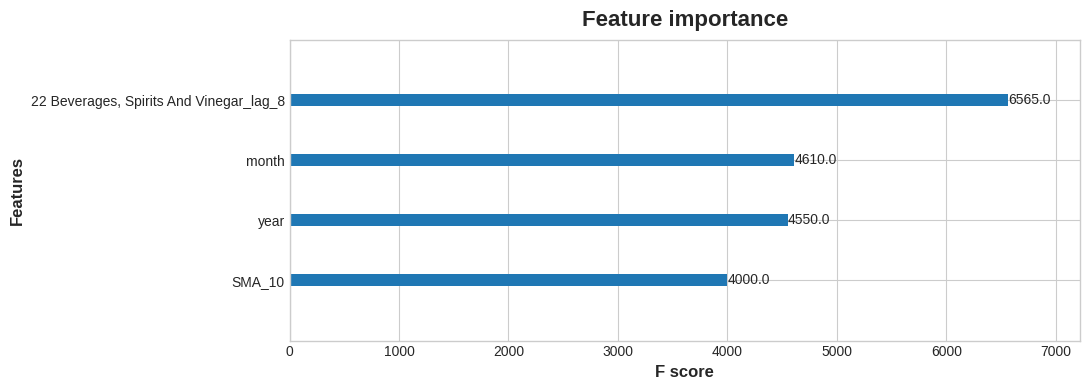

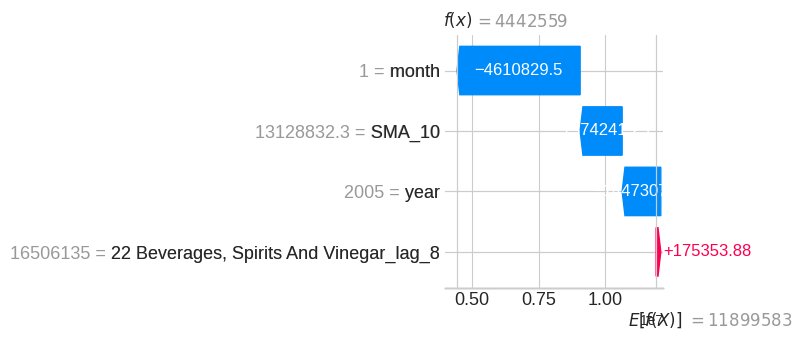

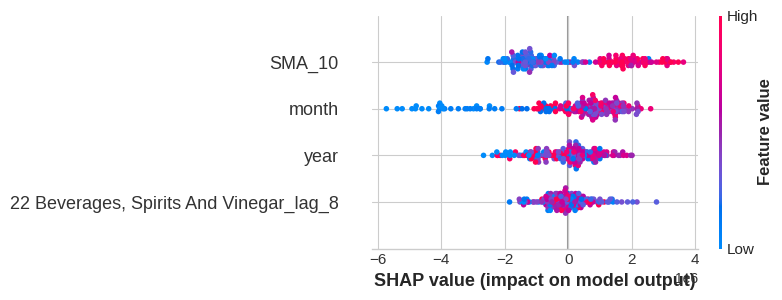

KeyError: 'Prediction'

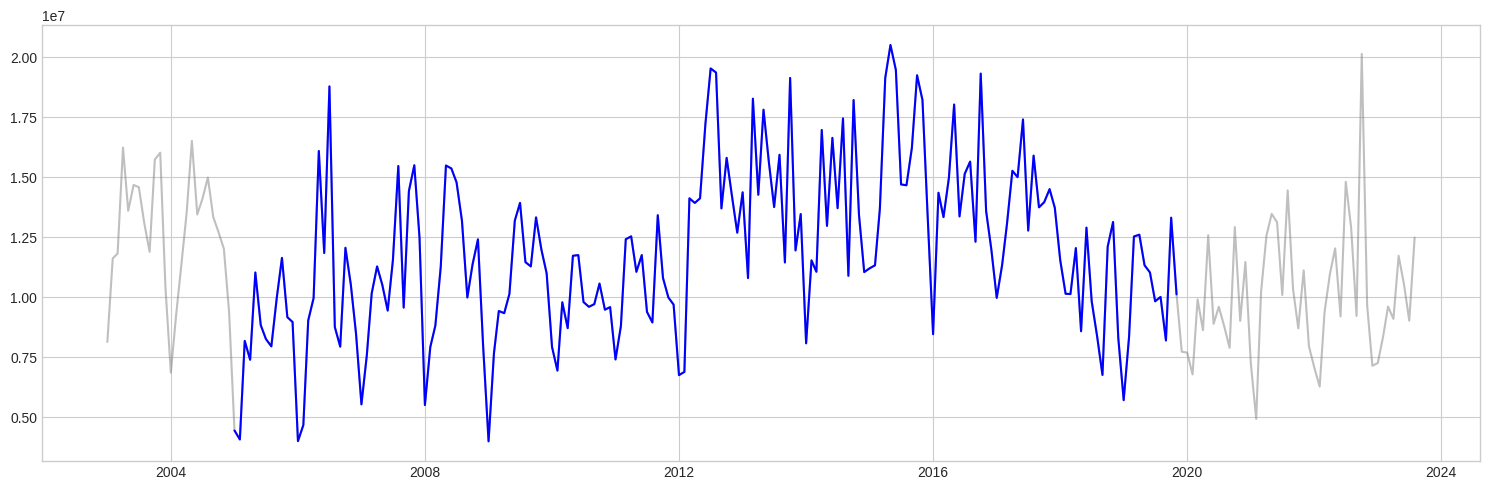

In [ ]:
train_XGBoost(Weight_HS22, '22 Beverages, Spirits And Vinegar')

In [ ]:
target_columns = SUM_values.columns
models_metrics = {}

for target_column in target_columns:
    print(f"Training model for {target_column}")
    reg_model, rmse_value, mae_value, mape_value = train_XGBoost(SUM_values, target_column)
    models_metrics[target_column] = {
        'model': reg_model,
        'RMSE': rmse_value,
        'MAE': mae_value,
        'MAPE': mape_value
    }

In [ ]:
target_columns = ['03 Fish, Crustaceans & Aquatic Invertebrates','22 Beverages, Spirits And Vinegar','68 Art Of Stone, Plaster, Cement, Asbestos, Mica Etc.']
models_metrics = {}

for target_column in target_columns:
    print(f"Training model for {target_column}")
    reg_model, rmse_value, mae_value, mape_value = train_XGBoost(SUM_weight, target_column)
    models_metrics[target_column] = {
        'model': reg_model,
        'RMSE': rmse_value,
        'MAE': mae_value,
        'MAPE': mape_value
    }

In [ ]:
shiplink = 'https://www.dropbox.com/scl/fi/pqo7wehwwk06jzttq8v01/shipsData.csv?rlkey=vvtt15ixfzzlv2rhcn7ec8v4b&dl=1'
ships = pd.read_csv(shiplink)
ships.head()

In [ ]:
sorted_by_operators = ships.sort_values(by='Operator')

In [ ]:
sorted_by_operators.reset_index(inplace=True)

In [ ]:
sorted_by_operators.head()

In [ ]:
sorted_by_operators.to_csv('ships.csv')

In [ ]:
ships['Operator'].nunique()

In [ ]:
ships.groupby('Operator')[['Length','Width']].describe().T

# LSTM

In [ ]:
import sklearn
sklearn.__version__

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split
from sklearn import set_config
from IPython.display import display

from sklearn.linear_model import LinearRegression
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation

In [ ]:
# Setup plotting
plt.style.use('seaborn-whitegrid')

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

In [ ]:
train_df, test_df = train_test_split(Value_84_39, random_state=42, shuffle=False)

In [ ]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [ ]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    ts = []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        ts.append(X.iloc[i + time_steps].name)
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys), ts

In [ ]:
train_df.head()

In [ ]:
time_steps = 12

X_train, y_train, ts_train = create_dataset(train_df, train_df['84Nuclear_39Plastics'], time_steps=time_steps)
X_test, y_test, ts_test = create_dataset(test_df, test_df['84Nuclear_39Plastics'], time_steps=time_steps)

print(X_train.shape, y_train.shape)

In [ ]:
model = keras.Sequential([
    layers.LSTM(units=128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(units=1)
])

model.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.001)
)

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=15,
    min_delta=0.00001,
    restore_best_weights=True,
)


history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=False,
    # callbacks=[early_stopping],
)

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();